In [1]:
# loading libraries

import glob
import os

import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from pywaffle import Waffle

In [2]:
pd.set_option("display.max_columns", None)

- Dataset all years

- Dataset same original and destination state

In [3]:
same_state = pd.read_csv('./assets/csv/df_all_years/same_state.csv', sep=',').drop(columns='Unnamed: 0')

In [4]:
# test with Belém-Marabá

In [5]:
df_sbbe_sbma = same_state[(same_state.dep_city == 'Belém') & (same_state.arr_city == 'Marabá')]

In [6]:
df_sbbe_sbma.icao_aircraft_type.unique()

array(['E145', 'F100', 'A320', 'A319', 'B737', 'B733', 'B738', 'C208',
       'E195', 'AT72', 'E190', 'AT45', 'A20N'], dtype=object)

In [7]:
df_sbbe_sbma.icao_carrier.unique()

array(['NES', 'TAM', 'VRG', 'GLO', 'SLX', 'AZU', 'TIB', 'OWT'],
      dtype=object)

In [8]:
df_sbbe_sbma[df_sbbe_sbma.icao_carrier == 'AZU'].sched_year.unique()

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [9]:
print(df_sbbe_sbma[df_sbbe_sbma.icao_carrier == 'AZU'].icao_aircraft_type.unique(),
df_sbbe_sbma[df_sbbe_sbma.icao_carrier == 'AZU'].seats_available.unique())

['E195' 'AT72' 'E190' 'AT45' 'A20N' 'A320'] [118  68 106  45  70 174 165 162]


In [10]:
df_sbbe_sbma.cluster_origin.unique()

array([3])

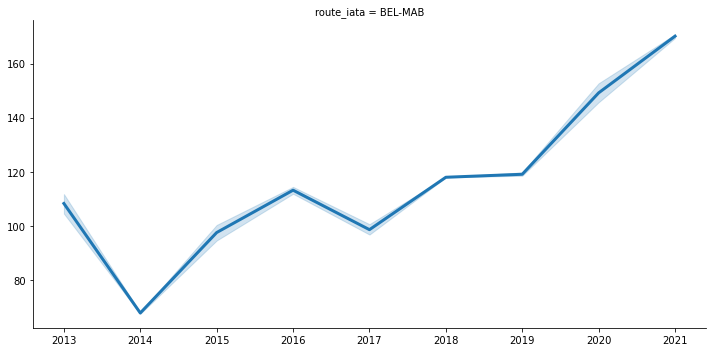

In [11]:
g = sns.FacetGrid(df_sbbe_sbma[df_sbbe_sbma.icao_carrier == 'AZU'], col='route_iata', height=5, aspect=2, dropna=True)
g.map_dataframe(sns.lineplot, x="sched_year", y="seats_available", linewidth=3);

In [12]:
# regional flights = same departure and arrival state

In [13]:
same_state['seats_sold'] = same_state['seats_sold'].astype(int)

In [14]:
same_state['seats_free'] = same_state['seats_free'].astype(int)

In [15]:
total_pax = same_state.seats_sold + same_state.seats_free

In [16]:
same_state.insert(loc=42, column='total_pax', value=total_pax)

In [18]:
same_state.head(2)

,icao_carrier,iata_carrier,flight,flight_step,icao_origin,iata_origin,dep_airport_name,dep_city,dep_state,dep_region,sched_date,sched_year,sched_month,sched_day,dep_time,dep_date,dep_year,dep_month,dep_day,dep_week_day,reference_month,icao_dest,iata_dest,arr_airport_name,arr_city,arr_state,arr_region,arr_time,arr_date,arr_year,arr_month,arr_day,icao_aircraft_type,aircraft_model,fuel_consumption_l,payload_kg,flight_distance_km,flight_hrs,flight_speed_avg,seats_available,seats_sold,seats_free,total_pax,pax_baggage_free_kg,pax_baggage_paid_kg,cargo_paid_kg,cargo_mail_kg,cargo_free_kg,aircraft_freight_kg,pax_free_km,cargo_paid_km,cargo_free_km,cargo_mail_km,baggage_free_km,baggage_paid_km,available_seat_km,revenue_pax_km,available_tonne_km,revenue_tonne_km,flight_unique_nr,route_icao,route_iata,lat_dd_origin,long_dd_origin,cluster_origin,lat_dd_dest,long_dd_dest,cluster_dest
0,GLO,G3,1735,4,SBCT,CWB,Afonso Pena,São José Dos Pinhais,PR,5,2002-09-10,2002,9,10,NaN,NaN,0,0,0,0,SETEMBRO,SBMH,NaN,Maringá,Maringá,PR,5,NaN,NaN,0,0,0,B737,BOEING 737-700 (WINGLETS) PAX,2386.0,15947,367.0,1.0,1.0,144,57,0,57,258,0,10.0,0.0,0.0,4543.0,0.0,3670,0,0,94686,0,52848,20919,5852,5852,1735_4,SBCT-SBMH,NaN,-25.5317,-49.1761,4,-23.4794,-52.0122,6
1,GLO,G3,1735,4,SBCT,CWB,Afonso Pena,São José Dos Pinhais,PR,5,2002-09-01,2002,9,1,NaN,NaN,0,0,0,0,SETEMBRO,SBMH,NaN,Maringá,Maringá,PR,5,NaN,NaN,0,0,0,B737,BOEING 737-700 (WINGLETS) PAX,2364.0,15947,367.0,1.0,1.0,144,50,0,50,330,0,0.0,0.0,0.0,4080.0,0.0,0,0,0,121110,0,52848,18350,5852,5852,1735_4,SBCT-SBMH,NaN,-25.5317,-49.1761,4,-23.4794,-52.0122,6


In [19]:
same_state.route_icao.nunique()

668

In [20]:
len(same_state)

889984

In [21]:
round(same_state.seats_sold.sum() / same_state.seats_available.sum(), 2)

0.69

In [22]:
round(((same_state.seats_sold.sum()) + (same_state.seats_free.sum())) / same_state.seats_available.sum(), 2)

0.71

In [23]:
sorted(same_state.cluster_origin.unique())

[1, 2, 3, 4, 5, 6, 7, 8]

In [225]:
flights_by_carrier = same_state.groupby('icao_carrier').agg(
    flights_by_carrier=('icao_carrier','count'),
    nr_routes=('route_icao',lambda x: x.nunique())
).sort_values(by='flights_by_carrier', ascending=False).reset_index()

In [226]:
flights_percentage = round((flights_by_carrier['flights_by_carrier'] / flights_by_carrier['flights_by_carrier'].sum()) * 100, 2)
route_percentage = round((flights_by_carrier['nr_routes'] / flights_by_carrier['nr_routes'].sum()) * 100, 2)

In [227]:
flights_by_carrier.insert(loc=2, column='flights_percentage', value=flights_percentage)
flights_by_carrier.insert(loc=4, column='route_percentage', value=route_percentage)

In [228]:
flights_by_carrier

,icao_carrier,flights_by_carrier,flights_percentage,nr_routes,route_percentage
0,AZU,389643,43.78,241,17.90
1,GLO,192086,21.58,97,7.21
2,TAM,69681,7.83,62,4.61
3,PTB,56370,6.33,64,4.75
4,TIB,39881,4.48,176,13.08
5,ONE,29960,3.37,20,1.49
6,PAM,19000,2.13,55,4.09
7,OWT,18649,2.10,269,19.99
8,SLX,17282,1.94,32,2.38
9,NES,14044,1.58,64,4.75


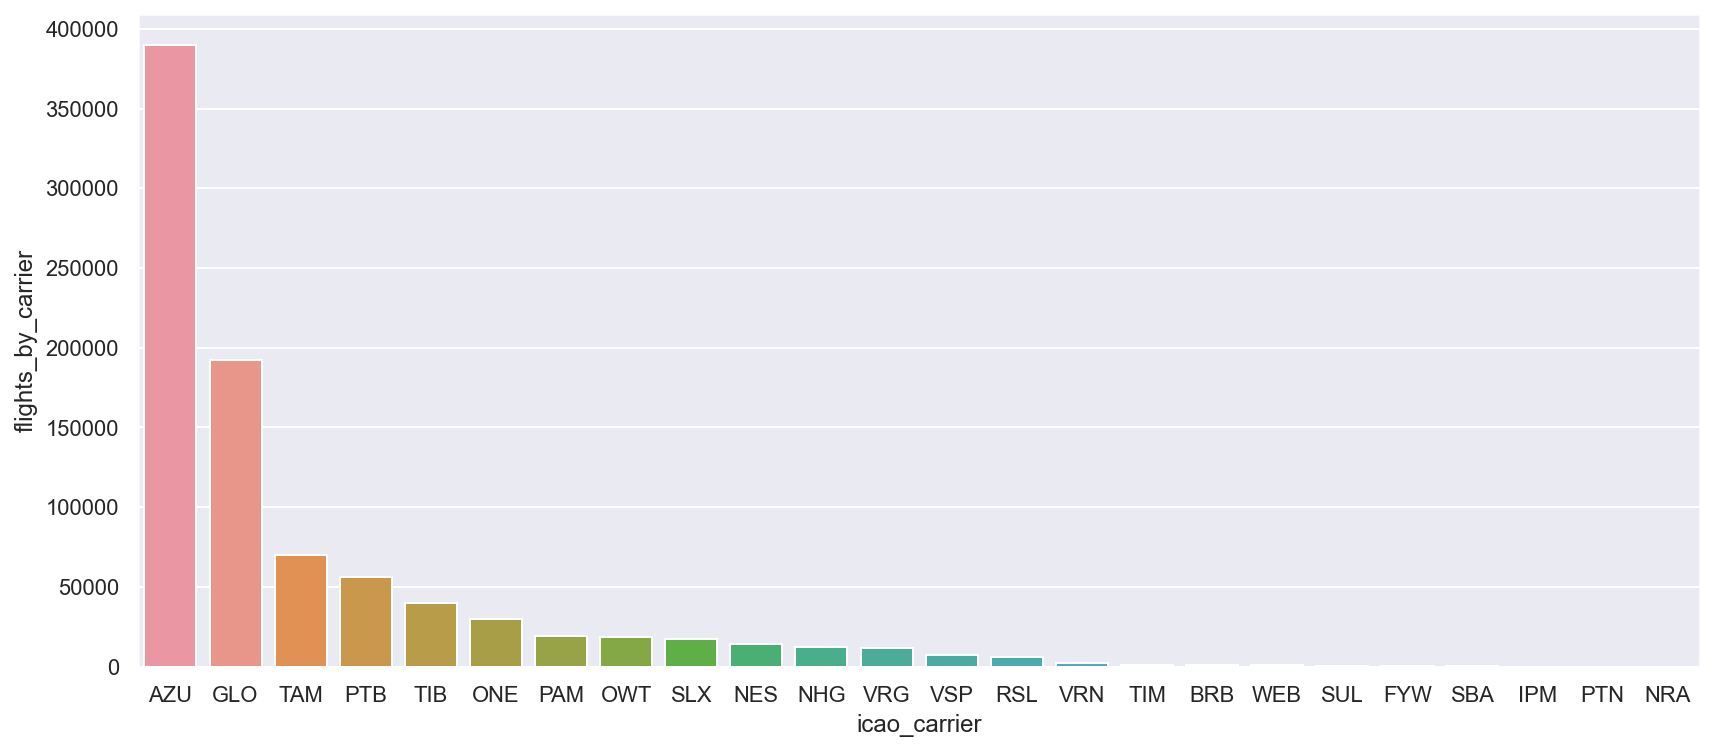

In [229]:
fig, ax = plt.subplots(figsize=(14,6))
sns.barplot(x = "icao_carrier", y = "flights_by_carrier", ax=ax, data=flights_by_carrier);

In [230]:
flights_by_year = same_state.groupby('sched_year').agg(
    icao_carriers=('icao_carrier',lambda x: x.nunique()),
    nr_flights=('icao_carrier','count'),
).sort_values(by='sched_year', ascending=False).reset_index()

In [231]:
flights_by_year

,sched_year,icao_carriers,nr_flights
0,2021,8,30745
1,2020,7,39416
2,2019,7,76674
3,2018,7,74093
4,2017,6,66452
5,2016,7,73107
6,2015,7,93941
7,2014,7,102308
8,2013,9,91441
9,2012,6,53027


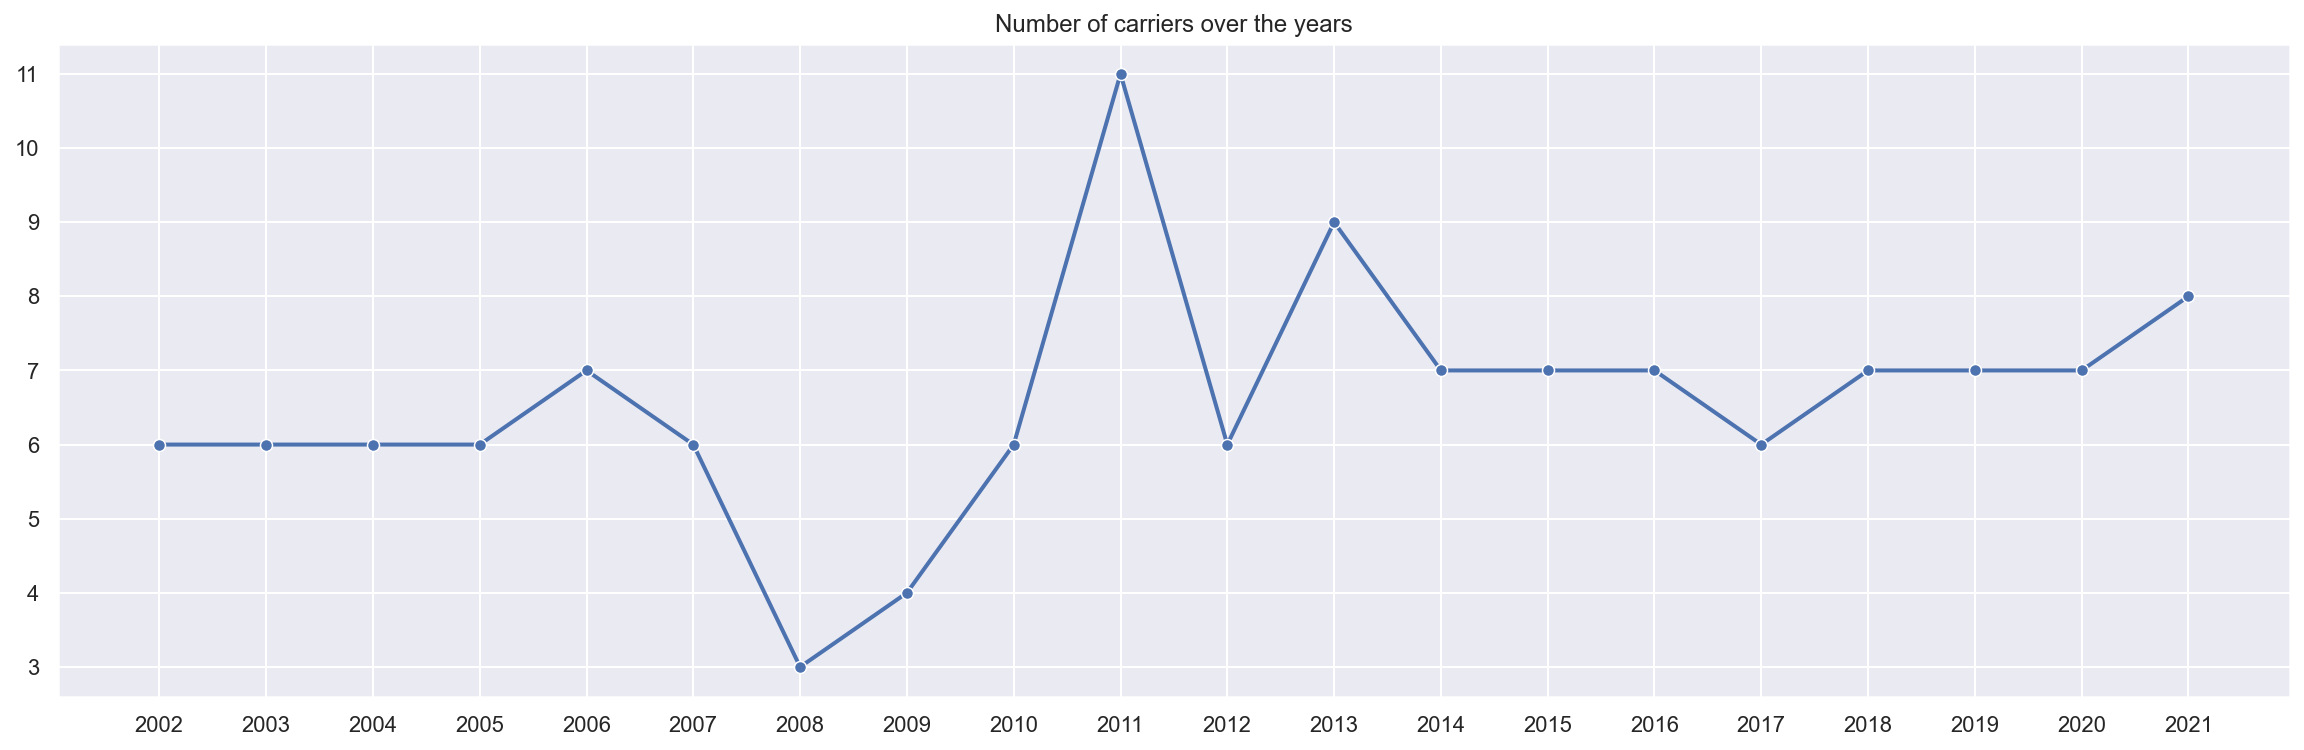

In [232]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(20,6))
sns.lineplot(data=flights_by_year, x="sched_year", y="icao_carriers", ax=ax, dashes=False, linewidth=2, marker="o")
ax.set(xticks=flights_by_year.sched_year.values)
ax.set(title='Number of carriers over the years')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show();

In [210]:
# last 5 years

In [211]:
last_5y = [2021,2020,2019,2018,2017,2016]

In [212]:
same_state_last_5y = same_state[
    same_state.sched_year.isin(last_5y) == True
]

In [213]:
same_state_last_5y

,icao_carrier,iata_carrier,flight,flight_step,icao_origin,iata_origin,dep_airport_name,dep_city,dep_state,dep_region,sched_date,sched_year,sched_month,sched_day,dep_time,dep_date,dep_year,dep_month,dep_day,dep_week_day,reference_month,icao_dest,iata_dest,arr_airport_name,arr_city,arr_state,arr_region,arr_time,arr_date,arr_year,arr_month,arr_day,icao_aircraft_type,aircraft_model,fuel_consumption_l,payload_kg,flight_distance_km,flight_hrs,flight_speed_avg,seats_available,seats_sold,seats_free,total_pax,pax_baggage_free_kg,pax_baggage_paid_kg,cargo_paid_kg,cargo_mail_kg,cargo_free_kg,aircraft_freight_kg,pax_free_km,cargo_paid_km,cargo_free_km,cargo_mail_km,baggage_free_km,baggage_paid_km,available_seat_km,revenue_pax_km,available_tonne_km,revenue_tonne_km,flight_unique_nr,route_icao,route_iata,lat_dd_origin,long_dd_origin,cluster_origin,lat_dd_dest,long_dd_dest,cluster_dest
529497,ONE,O6,6319,1,SBCH,XAP,Serafin Enoss Bertaso,Chapecó,SC,5,2016-09-01,2016,9,1,05:51:00,2016-09-01,2016,9,1,4,SETEMBRO,SBFL,FLN,Hercílio Luz,Florianópolis,SC,5,06:43:00,2016-09-01,2016,9,1,A320,AIRBUS A320-100/200,2185.0,18266,410.0,0.87,471.29,162,102,1,103,899,0,96.0,0.0,0.0,8720.0,410.0,39360,0,0,368590,0,66420,41820,7489,7489,6319_1,SBCH-SBFL,XAP-FLN,-27.1339,-52.6619,7,-27.6703,-48.5525,4
529498,ONE,O6,6378,2,SBFZ,FOR,Pinto Martins,Fortaleza,CE,2,2016-09-01,2016,9,1,19:26:00,2016-09-01,2016,9,1,4,SETEMBRO,SBJU,JDO,Orlando Bezerra De Menezes,Juazeiro Do Norte,CE,2,20:20:00,2016-09-01,2016,9,1,A318,AIRBUS A318,2630.0,14198,391.0,0.90,434.93,120,109,0,109,1101,11,433.0,0.0,0.0,9720.0,0.0,169303,0,0,430491,4301,46920,42619,5551,5551,6378_2,SBFZ-SBJU,FOR-JDO,-3.7758,-38.5322,2,-7.2192,-39.2694,6
529499,ONE,O6,6379,1,SBJU,JDO,Orlando Bezerra De Menezes,Juazeiro Do Norte,CE,2,2016-09-01,2016,9,1,20:50:00,2016-09-01,2016,9,1,4,SETEMBRO,SBFZ,FOR,Pinto Martins,Fortaleza,CE,2,21:47:00,2016-09-01,2016,9,1,A318,AIRBUS A318,2506.0,14198,391.0,0.95,412.04,120,113,0,113,671,0,140.0,0.0,0.0,9286.0,0.0,54740,0,0,262361,0,46920,44183,5551,5551,6379_1,SBJU-SBFZ,JDO-FOR,-7.2192,-39.2694,6,-3.7758,-38.5322,2
529500,ONE,O6,6326,2,SBIL,IOS,Bahia - Jorge Amado,Ilhéus,BA,2,2016-09-01,2016,9,1,14:23:00,2016-09-01,2016,9,1,4,SETEMBRO,SBSV,SSA,Deputado Luís Eduardo Magalhães,Salvador,BA,2,15:06:00,2016-09-01,2016,9,1,A318,AIRBUS A318,1979.0,14079,225.0,0.72,313.11,120,104,1,105,1066,0,703.0,0.0,2.0,9646.0,225.0,158175,450,0,239850,0,27000,23400,3167,3167,6326_2,SBIL-SBSV,IOS-SSA,-14.8150,-39.0333,6,-12.9086,-38.3225,2
529501,ONE,O6,6327,1,SBSV,SSA,Deputado Luís Eduardo Magalhães,Salvador,BA,2,2016-09-01,2016,9,1,15:33:00,2016-09-01,2016,9,1,4,SETEMBRO,SBIL,IOS,Bahia - Jorge Amado,Ilhéus,BA,2,16:35:00,2016-09-01,2016,9,1,A318,AIRBUS A318,1993.0,14079,225.0,1.03,218.88,120,94,0,94,996,2,155.0,0.0,0.0,8203.0,0.0,34875,0,0,224100,450,27000,21150,3167,3167,6327_1,SBSV-SBIL,SSA-IOS,-12.9086,-38.3225,2,-14.8150,-39.0333,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889979,GLO,G3,1943,1,SBSN,STM,Maestro Wilson Fonseca,Santarém,PA,1,2021-08-29,2021,8,29,15:24:00,2021-08-29,2021,8,29,7,AGOSTO,SBBE,BEL,Internacional De Belém/Val De Cans/Júlio Cezar...,Belém,PA,1,16:49:00,2021-08-29,2021,8,29,B38M,BOEING 737 MAX 8,3152.0,19800,710.0,1.42,501.44,186,142,0,142,738,0,31.0,0.0,0.0,11419.0,0.0,22010,0,0,523980,0,132060,100820,14058,14058,1943_1,SBSN-SBBE,STM-BEL,-2.4247,-54.7858,6,-1.3847,-48.4789,3
889980,GLO,G3,1943,1,SBSN,STM,Maestro Wilson Fonseca,Santarém,PA,1,2021-08-04,2021,8,4,15:11:00,2021-08-04,2021,8,4,3,AGOSTO,SBBE,BEL,Internacional De Belém/Val De Cans/Júlio Cezar...,Belém,PA,1,16:31:00,2021-08-04,2021,8,4,B738,BOEING 737-800,3334.0,19800,710.0,1.33,532.78,186,131,0,131,464,0,815.0,0.0,0.0,11104.0,0.0,578650,0,0,329440,0,132060,93010,14058,14058,1943_1,S

In [214]:
same_state_last_5y.route_icao.nunique()

509

In [233]:
flights_5y = same_state_last_5y.groupby('icao_carrier').agg(
    nr_of_routes=('route_icao',lambda x: x.nunique()),
    paid_pax=('seats_sold','sum'),
    total_pax=('total_pax','sum'),
    flights_by_carrier=('icao_carrier','count')
).sort_values(by='flights_by_carrier', ascending=False).reset_index()

In [234]:
route_percentage = round((flights_5y['nr_of_routes'] / flights_5y['nr_of_routes'].sum()) * 100, 2)
ratio_free_pax = round(((flights_5y.total_pax - flights_5y.paid_pax) / flights_5y.total_pax) * 100, 2)
flight_percentage = round((flights_5y['flights_by_carrier'] / flights_5y['flights_by_carrier'].sum()) * 100, 2)
mean_paid_pax_by_fligth = round(flights_5y['paid_pax'] / flights_5y['flights_by_carrier'], 2)

In [235]:
flights_5y.insert(loc=2, column='route_percentage', value=route_percentage)
flights_5y.insert(loc=5, column='ratio_free_pax', value=ratio_free_pax)
flights_5y.insert(loc=7, column='flight_percentage', value=flight_percentage)
flights_5y.insert(loc=8, column='mean_paid_pax_by_fligth', value=paid_pax_percentage_by_fligth)

In [236]:
flights_5y

,icao_carrier,nr_of_routes,route_percentage,paid_pax,total_pax,ratio_free_pax,flights_by_carrier,flight_percentage,mean_paid_pax_by_fligth
0,AZU,176,25.25,14747143,15175460,2.82,224192,62.19,65.78
1,PTB,54,7.75,1481866,1499448,1.17,34701,9.63,42.70
2,GLO,56,8.03,3178845,3268660,2.75,29604,8.21,107.38
3,TAM,38,5.45,2552722,2613249,2.32,21238,5.89,120.20
4,OWT,269,38.59,77896,77896,0.00,18649,5.17,4.18
5,ONE,20,2.87,1963677,1971148,0.38,15992,4.44,122.79
6,PAM,52,7.46,513473,518534,0.98,15058,4.18,34.10
7,SUL,26,3.73,3292,3292,0.00,664,0.18,4.96
8,FYW,4,0.57,8648,8649,0.01,346,0.10,24.99
9,IPM,2,0.29,4465,4465,0.00,43,0.01,103.84


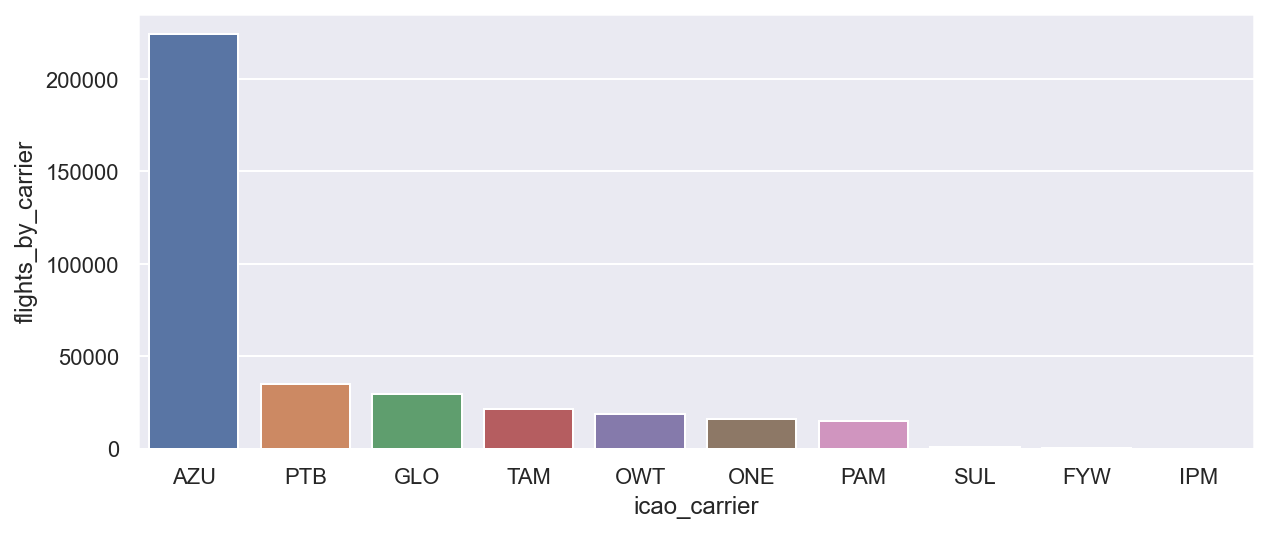

In [222]:
fig, ax = plt.subplots(figsize=(10,4))
sns.barplot(x = "icao_carrier", y = "flights_by_carrier", ax=ax, data=flights_5y);

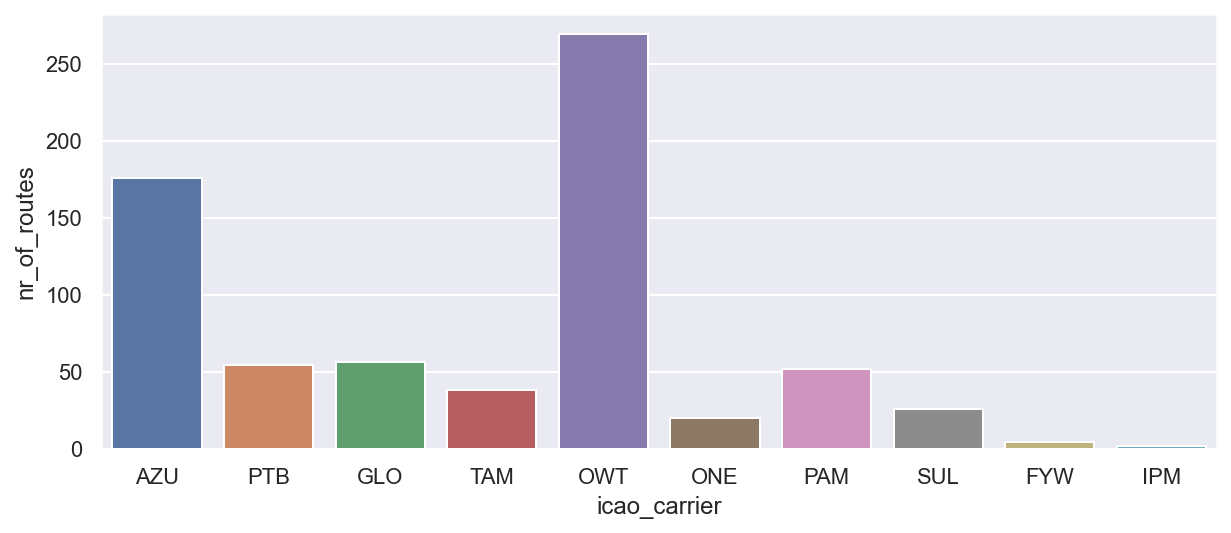

In [224]:
fig, ax = plt.subplots(figsize=(10,4))
sns.barplot(x = "icao_carrier", y = "nr_of_routes", ax=ax, data=flights_5y);

In [273]:
carrier_plot = same_state_last_5y.groupby(['icao_carrier', 'sched_year', 'sched_month']).agg(
    paid_pax=('seats_sold','sum'),
    total_pax=('total_pax','sum'),
    route_nr=('route_icao',lambda x: x.nunique()),
    flights_by_carrier=('icao_carrier','count')
).sort_values(by='icao_carrier', ascending=True).reset_index()

In [274]:
carrier_plot

,icao_carrier,sched_year,sched_month,paid_pax,total_pax,route_nr,flights_by_carrier
0,AZU,2016,1,22918,23309,21,342
1,AZU,2018,11,25364,25723,22,324
2,AZU,2018,12,29608,29975,26,342
3,AZU,2019,1,31392,31728,27,356
4,AZU,2019,2,25501,25836,27,305
...,...,...,...,...,...,...,...
227,PTB,2018,3,1916,1928,6,81
228,PTB,2017,3,3613,3641,4,99
229,TAM,2018,7,139,141,1,1
230,TAM,2018,5,128,133,1,1


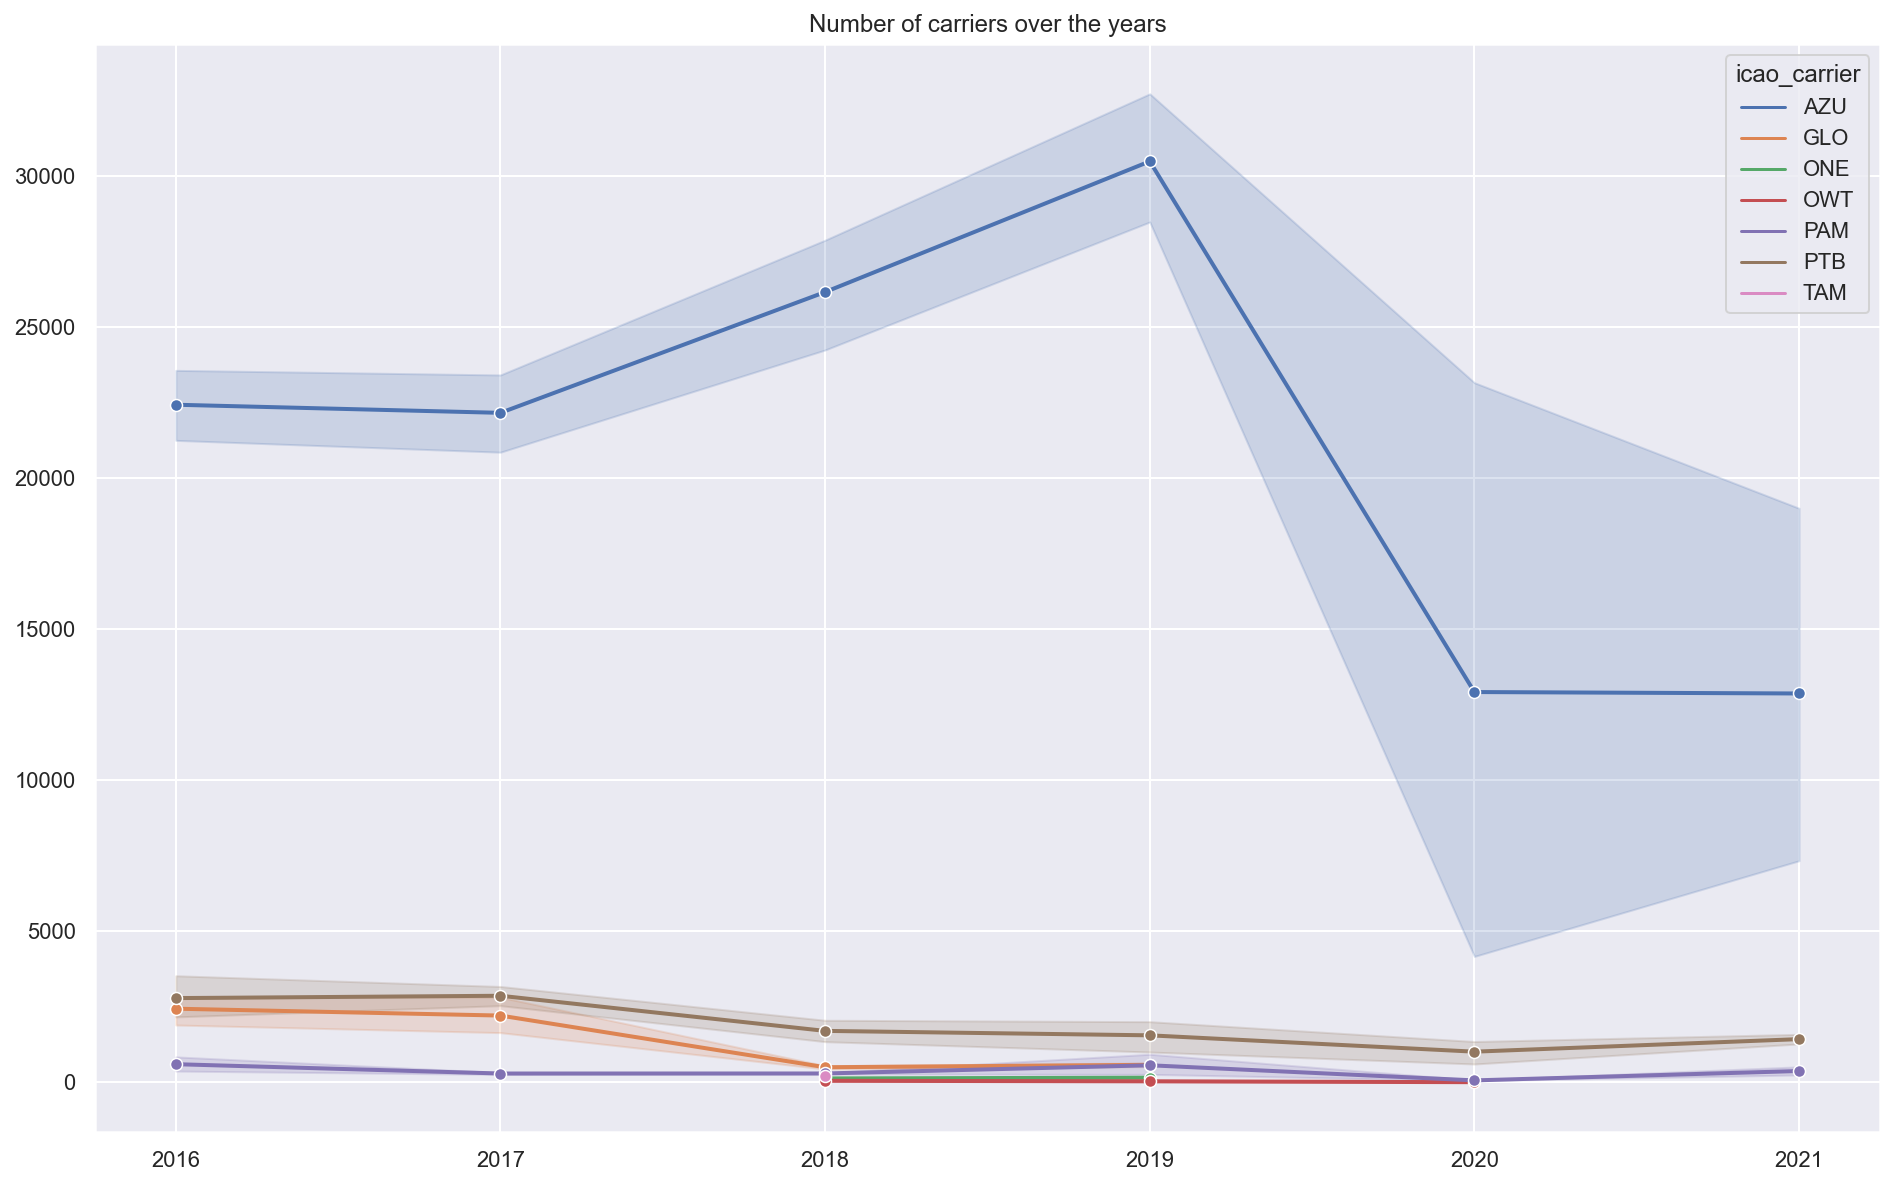

In [275]:
sns.set_theme(style="darkgrid")

fig, ax = plt.subplots(figsize=(16,10))

sns.lineplot(data=carrier_plot, x="sched_year", y="total_pax", ax=ax, hue='icao_carrier', linewidth=2, marker="o")
# ax.set(xticks=flights_by_year.sched_year.values)
ax.set(title='Number of carriers over the years')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show();

In [276]:
flights_5y = same_state_last_5y.groupby('sched_year').agg(
    icao_carriers=('icao_carrier',lambda x: x.nunique()),
    nr_flights=('icao_carrier','count')
).sort_values(by='sched_year', ascending=False).reset_index()

In [277]:
flights_5y

,sched_year,icao_carriers,nr_flights
0,2021,3,987
1,2020,4,1531
2,2019,6,4944
3,2018,7,4965
4,2017,4,4665
5,2016,4,4999


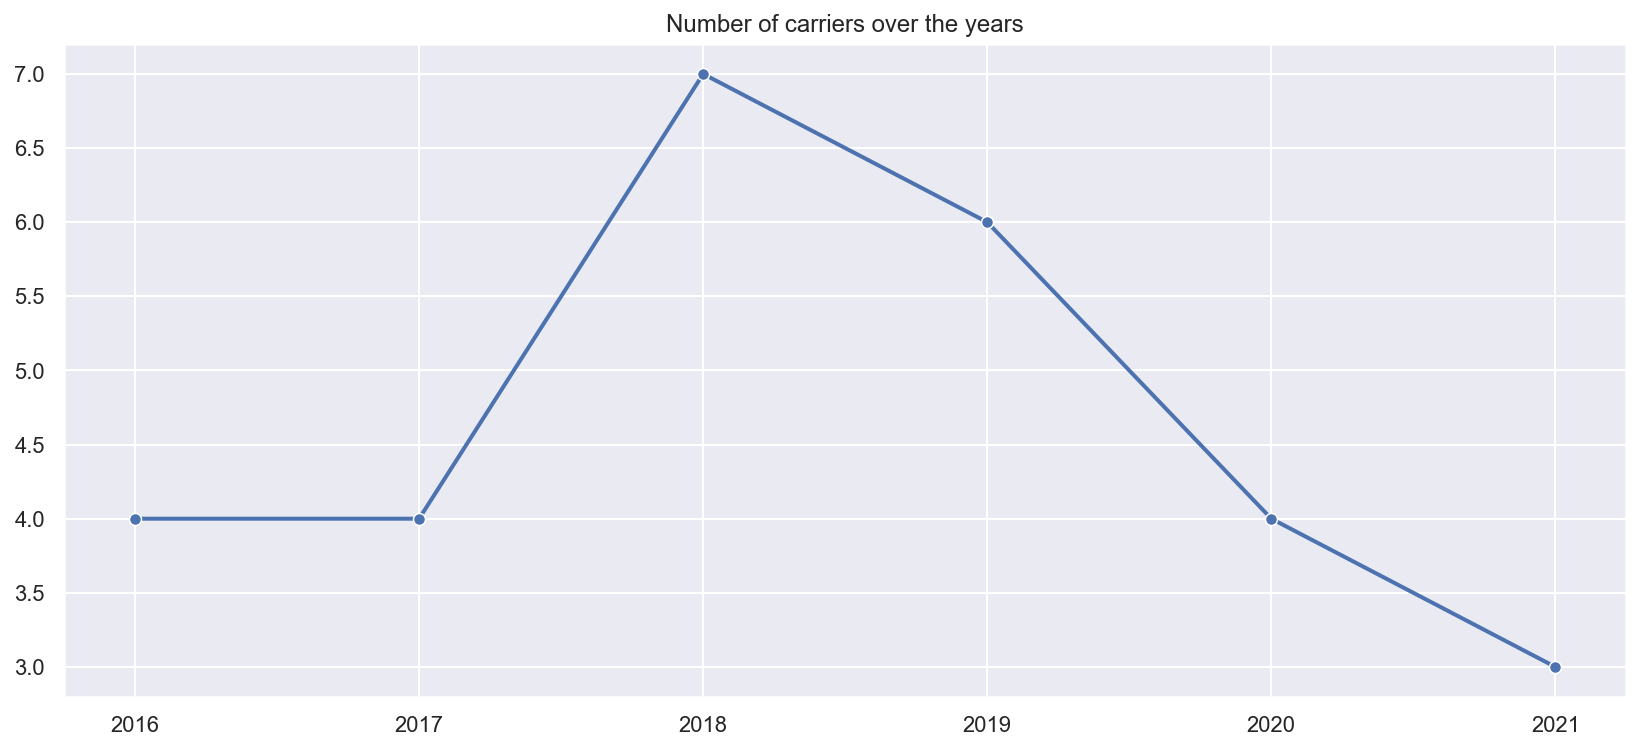

In [278]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(14,6))
sns.lineplot(data=flights_5y, x="sched_year", y="icao_carriers", ax=ax, dashes=False, linewidth=2, marker="o")
# ax.set(xticks=flights_by_year.sched_year.values)
ax.set(title='Number of carriers over the years')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show();

In [26]:
df_reg_cluster_8 = df_reg[df_reg.cluster_origin == 8]

In [27]:
df_reg_cluster_8_carrier = pd.DataFrame(df_reg_cluster_8.groupby('icao_carrier')['icao_origin'].nunique().sort_values(ascending=False)).reset_index()

In [28]:
df_reg_cluster_8_carrier

,icao_carrier,icao_origin
0,OWT,85
1,AZU,55
2,TIB,44
3,PAM,15
4,PTB,13
5,NES,12
6,NHG,12
7,SLX,10
8,SUL,9
9,GLO,8


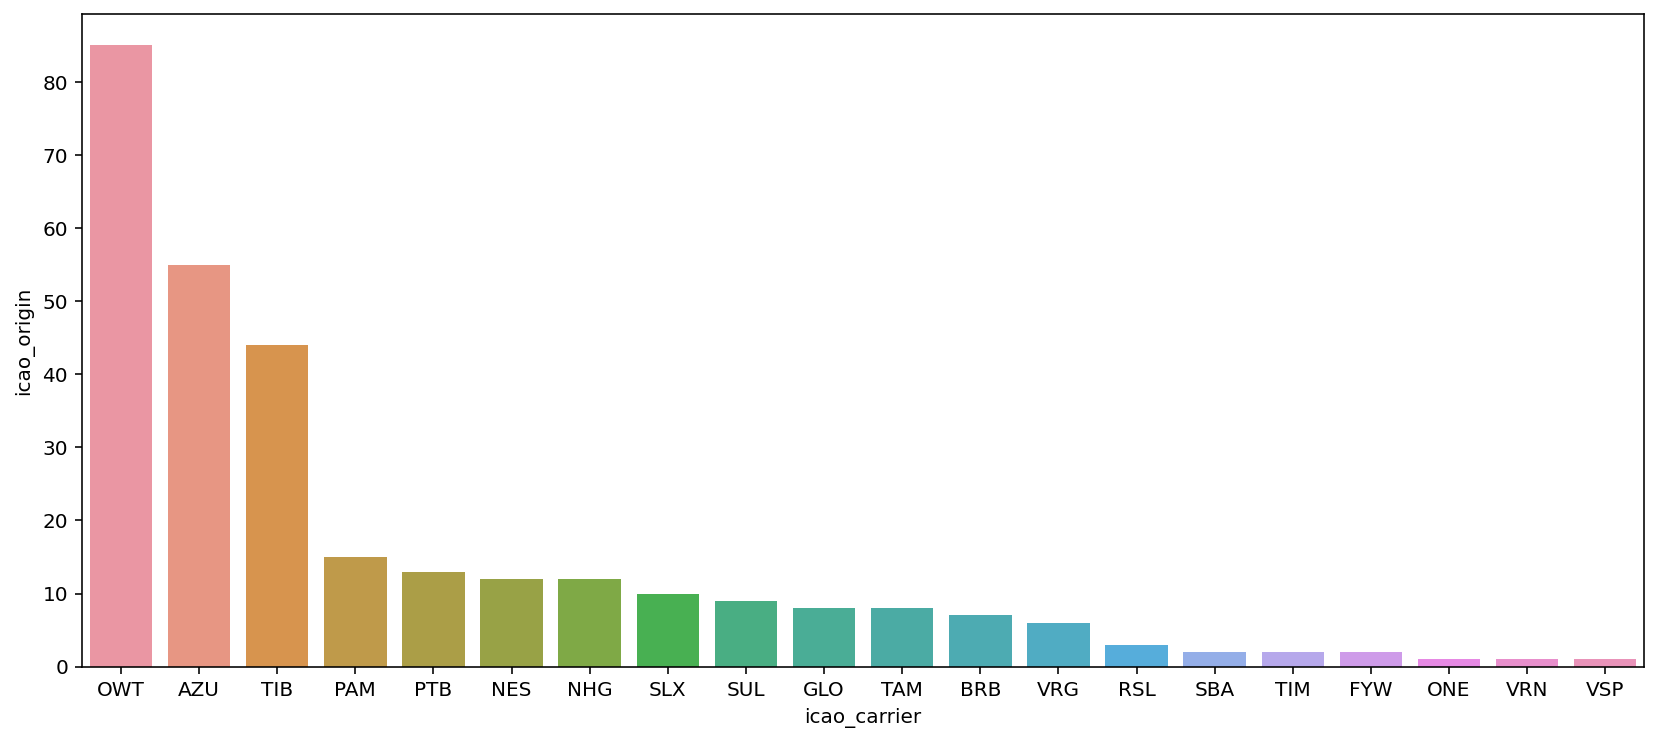

In [29]:
fig, ax = plt.subplots(figsize=(14,6))

sns.barplot(x = "icao_carrier", y = "icao_origin", ax=ax, data=df_reg_cluster_8_carrier);

In [31]:
year_count_carrier = pd.DataFrame(same_state.groupby('sched_year')['icao_carrier'].nunique()).reset_index()

In [32]:
year_count_carrier

,sched_year,icao_carrier
0,2002,6
1,2003,6
2,2004,6
3,2005,6
4,2006,7
5,2007,6
6,2008,3
7,2009,4
8,2010,6
9,2011,11


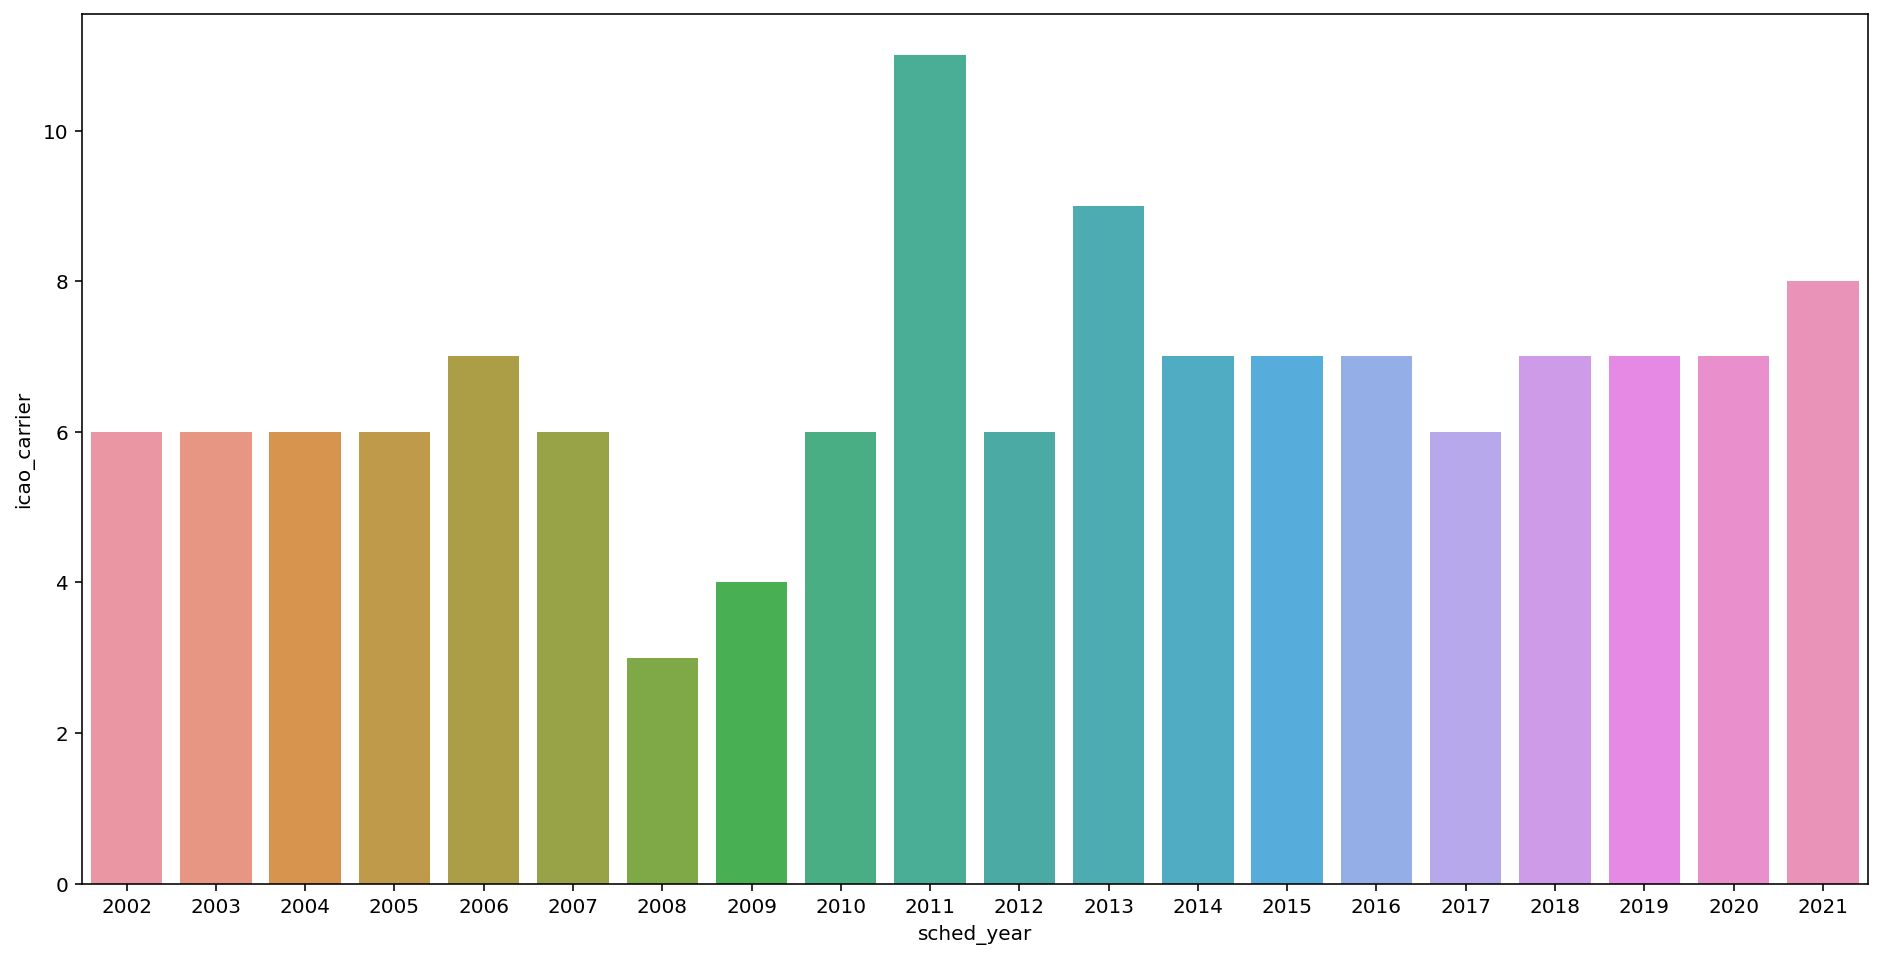

In [33]:
fig_dims = (16, 8)

fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(x = "sched_year", y = "icao_carrier", ax=ax, data=year_count_carrier);

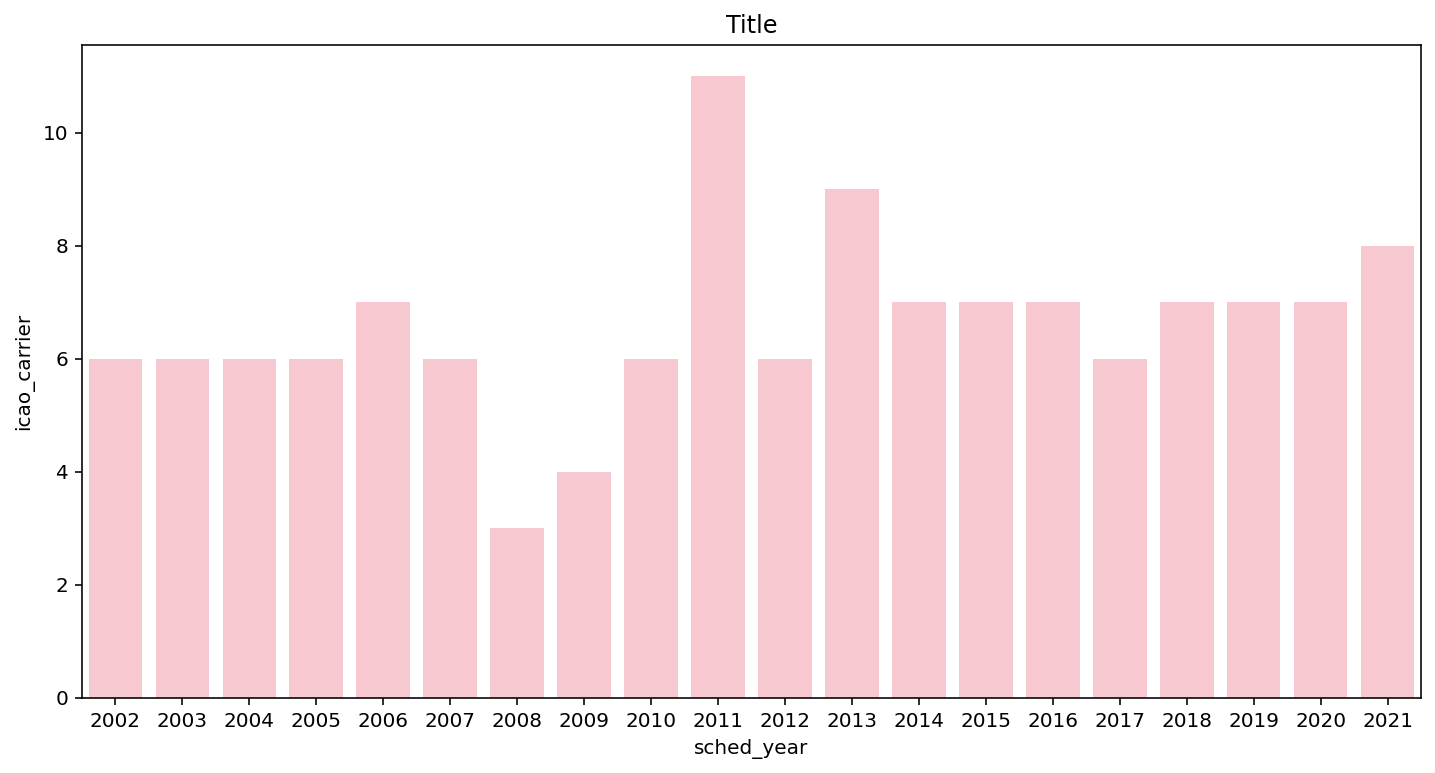

In [34]:
# Set up for higher resolution screen
%config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(12, 6))
plt.title("Title")
sns.barplot(x="sched_year", y="icao_carrier", data=year_count_carrier, color="pink")
plt.show()

In [35]:
df_reg_cluster_8.icao_carrier.unique()

array(['VRG', 'NES', 'RSL', 'TAM', 'VSP', 'GLO', 'BRB', 'TIM', 'NHG',
       'VRN', 'TIB', 'PTB', 'SBA', 'SLX', 'AZU', 'PAM', 'FYW', 'OWT',
       'ONE', 'SUL'], dtype=object)

In [36]:
df_reg_cluster_8[df_reg_cluster_8.icao_carrier == 'TAM'].dep_city.unique()

array(['Corumbá', 'São José Dos Campos', 'Araraquara', 'Forquilhinha',
       'Cabo Frio', 'Una', 'Arealva', 'São Carlos'], dtype=object)

In [37]:
df_reg_cluster_8[df_reg_cluster_8.icao_carrier == 'TAM'].route_icao.unique()

array(['SBCR-SBCG', 'SBSJ-SBGR', 'SBAQ-SBSP', 'SBCM-SBFL', 'SBCB-SBRJ',
       'SBTC-SBSV', 'SBAE-SBSP', 'SBAE-SBGR', 'SDSC-SBGR', 'SDSC-SBSP'],
      dtype=object)

In [38]:
df_reg_cluster_8[(df_reg_cluster_8.icao_carrier == 'TAM') & (df_reg_cluster_8.route_icao == 'SBCR-SBCG')].seats_available.unique()

array([108, 122, 143, 168, 174, 144])

In [39]:
df_reg_cluster_8[(df_reg_cluster_8.icao_carrier == 'TAM') & (df_reg_cluster_8.route_icao == 'SBCR-SBCG')].sched_year.unique()

array([2002, 2004, 2005, 2006, 2007, 2008])

In [40]:
df_reg_cluster_8_azul = df_reg_cluster_8[df_reg_cluster_8.icao_carrier == 'AZU'].reset_index()

In [41]:
df_reg_cluster_8_azul

,index,icao_carrier,iata_carrier,flight,flight_step,icao_origin,iata_origin,dep_airport_name,dep_city,dep_state,dep_region,sched_date,sched_year,sched_month,sched_day,dep_time,dep_date,dep_year,dep_month,dep_day,dep_week_day,reference_month,icao_dest,iata_dest,arr_airport_name,arr_city,arr_state,arr_region,arr_time,arr_date,arr_year,arr_month,arr_day,icao_aircraft_type,aircraft_model,fuel_consumption_l,payload_kg,flight_distance_km,flight_hrs,flight_speed_avg,seats_available,seats_sold,seats_free,pax_baggage_free_kg,pax_baggage_paid_kg,cargo_paid_kg,cargo_mail_kg,cargo_free_kg,aircraft_freight_kg,pax_free_km,cargo_paid_km,cargo_free_km,cargo_mail_km,baggage_free_km,baggage_paid_km,available_seat_km,revenue_pax_km,available_tonne_km,revenue_tonne_km,flight_unique_nr,route_icao,route_iata,lat_dd_origin,long_dd_origin,cluster_origin,lat_dd_dest,long_dd_dest,cluster_dest
0,158890,AZU,AD,4347,1,SBML,MII,Frank Miloye Milenkovich,Marília,SP,4,2011-12-01,2011,12,1,14:25:00,2011-12-01,2011,12,1,4,DEZEMBRO,SBKP,VCP,Viracopos,Campinas,SP,4,15:24:00,2011-12-01,2011,12,1,AT72,AEROSPATIALE/ALENIA ATR 72 FREIGHTER,402.0,6445,301.0,0.98,306.66,66,50.0,2.0,1054,0,0.0,0.0,0.0,4954.0,602.0,0,0,0,317254,0,19866,15050,1939,1939,4347_1,SBML-SBKP,MII-VCP,-22.1956,-49.9269,8,-23.0069,-47.1344,3
1,158891,AZU,AD,4333,1,SBAU,ARU,Estadual Dario Guarita,Araçatuba,SP,4,2011-12-01,2011,12,1,06:40:00,2011-12-01,2011,12,1,4,DEZEMBRO,SBKP,VCP,Viracopos,Campinas,SP,4,08:00:00,2011-12-01,2011,12,1,AT72,AEROSPATIALE/ALENIA ATR 72 FREIGHTER,702.0,6445,397.0,1.33,298.82,66,61.0,0.0,1317,0,0.0,0.0,0.0,5892.0,0.0,0,0,0,522849,0,26202,24217,2558,2558,4333_1,SBAU-SBKP,ARU-VCP,-21.1442,-50.4264,8,-23.0069,-47.1344,3
2,158895,AZU,AD,4335,1,SBAU,ARU,Estadual Dario Guarita,Araçatuba,SP,4,2011-12-01,2011,12,1,14:33:00,2011-12-01,2011,12,1,4,DEZEMBRO,SBKP,VCP,Viracopos,Campinas,SP,4,15:59:00,2011-12-01,2011,12,1,AT72,AEROSPATIALE/ALENIA ATR 72 FREIGHTER,623.0,6445,397.0,1.43,277.92,66,46.0,0.0,946,0,0.0,0.0,0.0,4396.0,0.0,0,0,0,375562,0,26202,18262,2558,2558,4335_1,SBAU-SBKP,ARU-VCP,-21.1442,-50.4264,8,-23.0069,-47.1344,3
3,158909,AZU,AD,4363,1,SBML,MII,Frank Miloye Milenkovich,Marília,SP,4,2011-12-02,2011,12,2,06:40:00,2011-12-02,2011,12,2,5,DEZEMBRO,SBKP,VCP,Viracopos,Campinas,SP,4,07:43:00,2011-12-02,2011,12,2,AT72,AEROSPATIALE/ALENIA ATR 72 FREIGHTER,410.0,6645,301.0,1.05,286.21,66,52.0,0.0,1148,0,0.0,0.0,0.0,5048.0,0.0,0,0,0,345548,0,19866,15652,2000,2000,4363_1,SBML-SBKP,MII-VCP,-22.1956,-49.9269,8,-23.0069,-47.1344,3
4,158914,AZU,AD,4347,1,SBML,MII,Frank Miloye Milenkovich,Marília,SP,4,2011-12-02,2011,12,2,14:21:00,2011-12-02,2011,12,2,5,DEZEMBRO,SBKP,VCP,Viracopos,Campinas,SP,4,15:12:00,2011-12-02,2011,12,2,AT72,AEROSPATIALE/ALENIA ATR 72 FREIGHTER,473.0,6445,301.0,0.85,353.56,66,48.0,2.0,1022,0,0.0,0.0,0.0,4772.0,602.0,0,0,0,307622,0,19866,14448,1939,1939,4347_1,SBML-SBKP,MII-VCP,-22.1956,-49.9269,8,-23.0069,-47.1344,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71859,889037,AZU,AD,4184,1,SBTF,TFF,Tefé,Tefé,AM,1,2021-08-06,2021,8,6,08:52:00,2021-08-06,2021,8,6,5,AGOSTO,SBEG,MAO,Eduardo Gomes,Manaus,AM,1,09:47:00,2021-08-06,2021,8,6,E195,EMBRAER 195/ERJ-190-200,2272.0,11432,520.0,0.92,567.67,118,82.0,5.0,462,10,0.0,0.0,0.0,6997.0,2600.0,0,0,0,240240,5200,61360,42640,5944,5944,4184_1,SBTF-SBEG,TFF-MAO,-3.3803,-64.7253,8,-3.0411,-60.0506,3
71860,889042,AZU,AD,4186,1,SBTT,TBT,Tabatinga,Tabatinga,AM,1,2021-08-31,2021,8,31,17:42:00,2021-08-31,2021,8,31,2,AGOSTO,SBEG,MAO,Eduardo Gomes,Manaus,AM,1,19:30:00,2021-08-31,2021,8,31,E195,EMBRAER 195/ERJ-190-200,4661.0,10737,1105.0,1.80,614.09,118,90.0,2.0,795,72,3.0,0.0,0.0,7770.0,2210.0,3315,0,0,878475,79560,130390,99450,11864,11864,4186_1,SBTT-SBEG,TBT-MAO,-4.2506,-69.9378,8,-3.0411,-60.0506,3
71861,

In [42]:
df_reg_cluster_8_azul_2 = df_reg_cluster_8_azul.groupby(['sched_year', 'route_icao'])['seats_available'].mean().unstack()

In [43]:
df_reg_cluster_8_azul_2.T

sched_year,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
route_icao,,,,,,,,,,,
SBAE-SBDN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118.000000
SBAE-SBGR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.373134,69.099099,NaN
SBAE-SBKP,NaN,69.873150,69.899687,69.794586,69.739750,69.513514,69.456053,69.5209,70.040741,69.588406,70.078313
SBAE-SBML,NaN,69.905437,69.962406,69.666667,69.802920,69.598639,69.698925,69.5000,69.466667,69.536000,NaN
SBAE-SBSR,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
SWHT-SBEG,NaN,NaN,45.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SWKO-SBEG,NaN,NaN,46.714286,45.750000,45.560976,NaN,NaN,NaN,NaN,NaN,NaN
SWPI-SBEG,NaN,NaN,68.000000,66.000000,95.612994,118.000000,NaN,NaN,NaN,NaN,118.000000


In [44]:
df_reg_cluster_8_azul[df_reg_cluster_8_azul.route_icao == 'SBSJ-SBKP'].seats_available.unique()

array([ 70,  68, 136])

In [45]:
df_reg_cluster_8_azul[df_reg_cluster_8_azul.route_icao == 'SBSJ-SBKP'].sched_year.unique()

array([2012, 2013, 2019, 2020])

In [46]:
df_reg_cluster_8_azul[df_reg_cluster_8_azul.route_icao == 'SBSJ-SBKP']

,index,icao_carrier,iata_carrier,flight,flight_step,icao_origin,iata_origin,dep_airport_name,dep_city,dep_state,dep_region,sched_date,sched_year,sched_month,sched_day,dep_time,dep_date,dep_year,dep_month,dep_day,dep_week_day,reference_month,icao_dest,iata_dest,arr_airport_name,arr_city,arr_state,arr_region,arr_time,arr_date,arr_year,arr_month,arr_day,icao_aircraft_type,aircraft_model,fuel_consumption_l,payload_kg,flight_distance_km,flight_hrs,flight_speed_avg,seats_available,seats_sold,seats_free,pax_baggage_free_kg,pax_baggage_paid_kg,cargo_paid_kg,cargo_mail_kg,cargo_free_kg,aircraft_freight_kg,pax_free_km,cargo_paid_km,cargo_free_km,cargo_mail_km,baggage_free_km,baggage_paid_km,available_seat_km,revenue_pax_km,available_tonne_km,revenue_tonne_km,flight_unique_nr,route_icao,route_iata,lat_dd_origin,long_dd_origin,cluster_origin,lat_dd_dest,long_dd_dest,cluster_dest
870,190096,AZU,AD,4365,1,SBSJ,SJK,Professor Urbano Ernesto Stumpf,São José Dos Campos,SP,4,2012-08-08,2012,8,8,07:00:00,2012-08-08,2012,8,8,3,AGOSTO,SBKP,VCP,Viracopos,Campinas,SP,4,07:45:00,2012-08-08,2012,8,8,AT72,AEROSPATIALE/ALENIA ATR 72 FREIGHTER,323.0,7545,132.0,0.75,175.37,70,44.0,1.0,1054,0,0.0,0.0,0.0,4429.0,132.0,0,0,0,139128,0,9240,5808,995,995,4365_1,SBSJ-SBKP,SJK-VCP,-23.2289,-45.8711,8,-23.0069,-47.1344,3
887,190162,AZU,AD,4365,1,SBSJ,SJK,Professor Urbano Ernesto Stumpf,São José Dos Campos,SP,4,2012-08-29,2012,8,29,06:52:00,2012-08-29,2012,8,29,3,AGOSTO,SBKP,VCP,Viracopos,Campinas,SP,4,07:36:00,2012-08-29,2012,8,29,AT72,AEROSPATIALE/ALENIA ATR 72 FREIGHTER,433.0,7825,132.0,0.73,180.18,70,57.0,2.0,1347,0,0.0,0.0,0.0,5772.0,264.0,0,0,0,177804,0,9240,7524,1032,1032,4365_1,SBSJ-SBKP,SJK-VCP,-23.2289,-45.8711,8,-23.0069,-47.1344,3
896,192057,AZU,AD,4365,1,SBSJ,SJK,Professor Urbano Ernesto Stumpf,São José Dos Campos,SP,4,2012-08-18,2012,8,18,06:53:00,2012-08-18,2012,8,18,6,AGOSTO,SBKP,VCP,Viracopos,Campinas,SP,4,07:40:00,2012-08-18,2012,8,18,AT72,AEROSPATIALE/ALENIA ATR 72 FREIGHTER,1065.0,7695,132.0,0.78,168.63,70,60.0,3.0,1472,11,0.0,0.0,0.0,6208.0,396.0,0,0,0,194304,1452,9240,7920,1015,1015,4365_1,SBSJ-SBKP,SJK-VCP,-23.2289,-45.8711,8,-23.0069,-47.1344,3
909,192095,AZU,AD,4365,1,SBSJ,SJK,Professor Urbano Ernesto Stumpf,São José Dos Campos,SP,4,2012-08-01,2012,8,1,06:52:00,2012-08-01,2012,8,1,3,AGOSTO,SBKP,VCP,Viracopos,Campinas,SP,4,07:34:00,2012-08-01,2012,8,1,AT72,AEROSPATIALE/ALENIA ATR 72 FREIGHTER,315.0,7525,132.0,0.70,187.90,70,42.0,1.0,989,0,0.0,0.0,0.0,4214.0,132.0,0,0,0,130548,0,9240,5544,993,993,4365_1,SBSJ-SBKP,SJK-VCP,-23.2289,-45.8711,8,-23.0069,-47.1344,3
923,192150,AZU,AD,4365,1,SBSJ,SJK,Professor Urbano Ernesto Stumpf,São José Dos Campos,SP,4,2012-08-02,2012,8,2,07:51:00,2012-08-02,2012,8,2,4,AGOSTO,SBKP,VCP,Viracopos,Campinas,SP,4,08:36:00,2012-08-02,2012,8,2,AT72,AEROSPATIALE/ALENIA ATR 72 FREIGHTER,284.0,7445,132.0,0.75,175.37,70,6.0,0.0,138,0,0.0,0.0,0.0,588.0,0.0,0,0,0,18216,0,9240,792,982,982,4365_1,SBSJ-SBKP,SJK-VCP,-23.2289,-45.8711,8,-23.0069,-47.1344,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8983,315766,AZU,AD,4365,1,SBSJ,SJK,Professor Urbano Ernesto Stumpf,São José Dos Campos,SP,4,2013-01-29,2013,1,29,06:56:00,2013-01-29,2013,1,29,2,JANEIRO,SBKP,VCP,Viracopos,Campinas,SP,4,07:41:00,2013-01-29,2013,1,29,AT72,AEROSPATIALE/ALENIA ATR 72 FREIGHTER,468.0,7345,132.0,0.75,175.37,70,45.0,2.0,452,50,0.0,0.0,0.0,4027.0,264.0,0,0,0,59664,6600,9240,5940,969,969,4365_1,SBSJ-SBKP,SJK-VCP,-23.2289,-45.8711,8,-23.0069,-47.1344,3
8996,315819,AZU,AD,4365,1,SBSJ,SJK,Professor Urbano Ernesto Stumpf,São José Dos Campos,SP,4,2013-01-30,2013,1,30,06:49:00,2013-01-30,2013,1,30,3,JANEIRO,SBKP,VCP,Viracopos,Campinas,SP,4,07:28:00,2013-01-30,2013,1,30,AT72,AEROSPATIALE/ALENIA ATR 72 FREIGHTER,481.0,7555,132.0,0.65,202.35

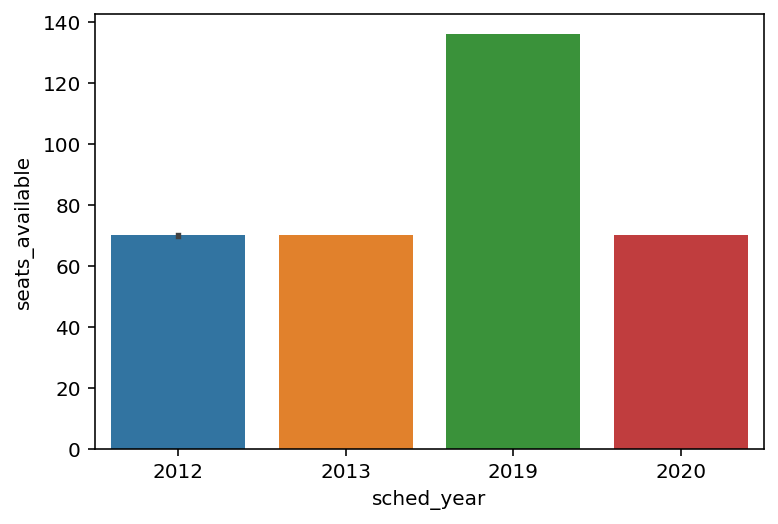

In [47]:
sns.barplot(data=df_reg_cluster_8_azul[df_reg_cluster_8_azul.route_icao == 'SBSJ-SBKP'], x="sched_year", y="seats_available");

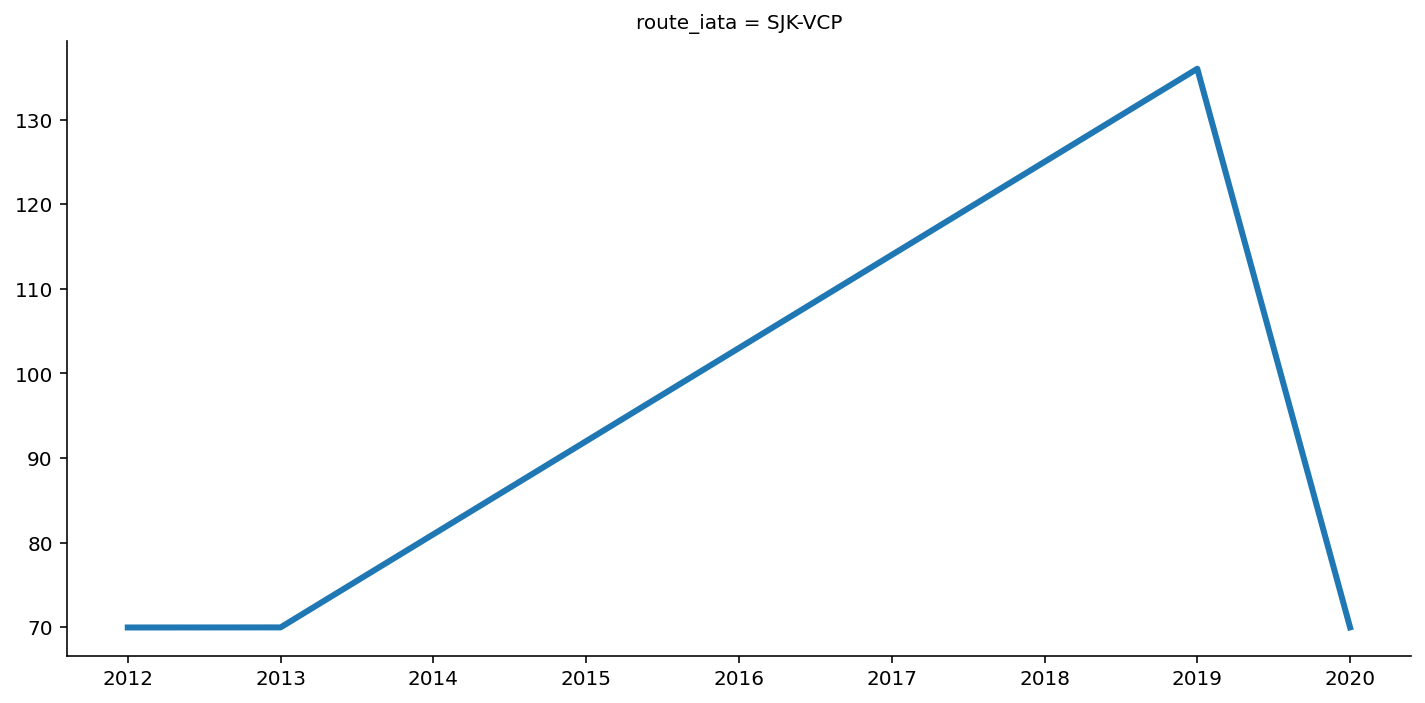

In [48]:
g = sns.FacetGrid(df_reg_cluster_8_azul[df_reg_cluster_8_azul.route_icao == 'SBSJ-SBKP'], col='route_iata', height=5, aspect=2, dropna=False)
g.map_dataframe(sns.lineplot, x="sched_year", y="seats_available", linewidth=3);

In [49]:
# FacetGrid plot

# https://www.youtube.com/watch?v=YYeqJllXHxM

# https://github.com/kimfetti/Videos/blob/master/Seaborn/16_FacetGrid.ipynb

In [50]:
penguins = sns.load_dataset('penguins')

In [51]:
penguins.island.unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

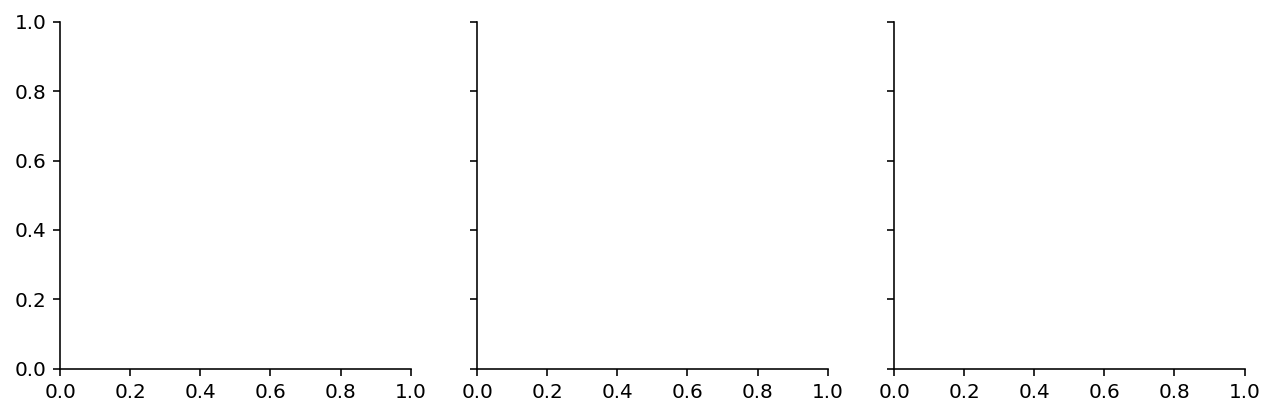

In [52]:
g = sns.FacetGrid(penguins, col='island');

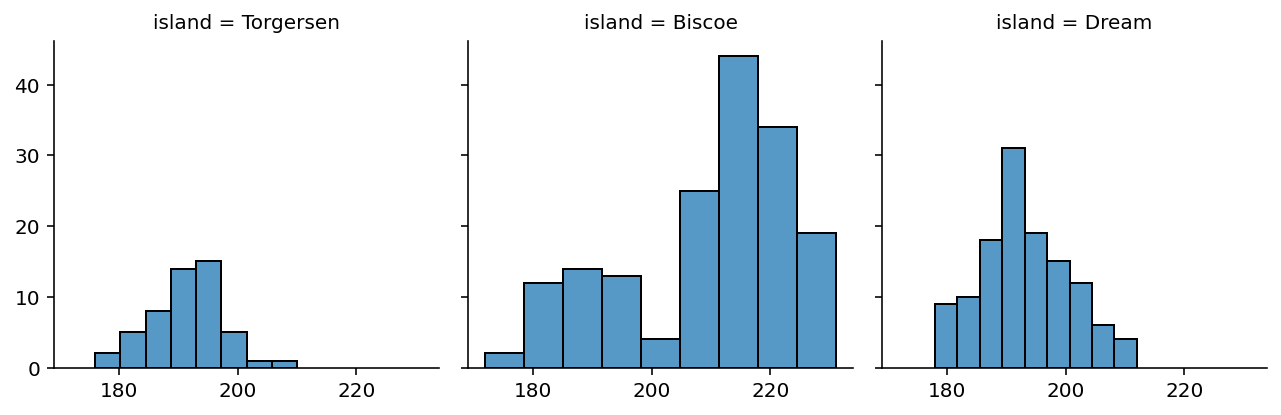

In [53]:
g = sns.FacetGrid(penguins, col='island')
g.map_dataframe(sns.histplot, x='flipper_length_mm'); 

In [54]:
# SBSO-SBCY

In [55]:
df_reg_cluster_8_azul[df_reg_cluster_8_azul.route_icao == 'SBSO-SBCY'].sched_year.unique()

array([2016, 2017, 2018, 2019, 2020, 2021])

In [56]:
df_reg_cluster_8_azul[df_reg_cluster_8_azul.route_icao == 'SBSO-SBCY'].seats_available.unique()

array([ 70,  68, 118, 106])

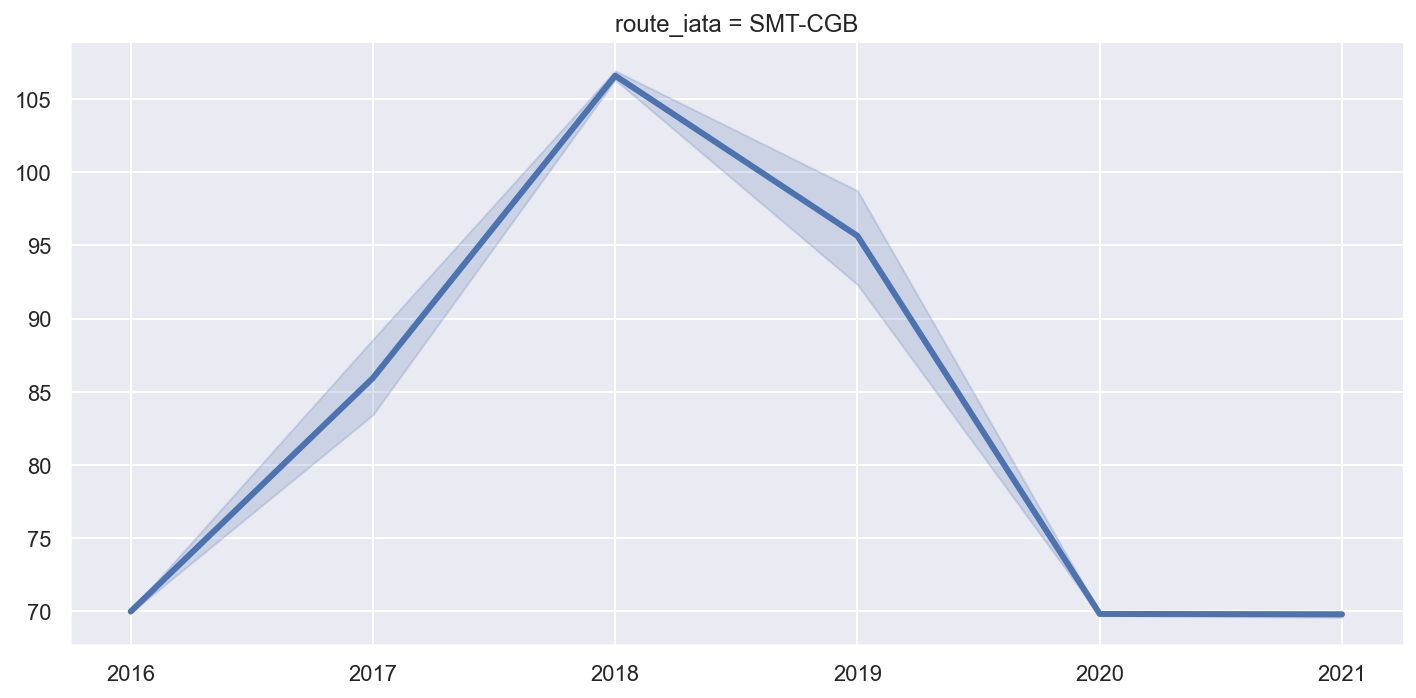

In [57]:
sns.set_theme(style="darkgrid")
g = sns.FacetGrid(df_reg_cluster_8_azul[df_reg_cluster_8_azul.route_icao == 'SBSO-SBCY'], col='route_iata', height=5, aspect=2, dropna=True)
g.map_dataframe(sns.lineplot, x="sched_year", y="seats_available", linewidth=3);

In [58]:
# Question asked on stackoverflow

In [59]:
# https://stackoverflow.com/questions/70238062/python-pandas-how-to-calculate-percentage-difference-row-wise-for-a-entire-dat

In [60]:
d = {'route_icao': [1,2,3,4],
     'col1': [np.nan,9,68,9],
     'col2': [9,48,70,np.nan],
     'col3': [9,np.nan,118,9],
     'col4': [9,118,106,9],
     'col5': [np.nan,np.nan,np.nan,48]
    }

stackoverflow = pd.DataFrame(data=d)

stackoverflow

,route_icao,col1,col2,col3,col4,col5
0,1,NaN,9.0,9.0,9,NaN
1,2,9.0,48.0,NaN,118,NaN
2,3,68.0,70.0,118.0,106,NaN
3,4,9.0,NaN,9.0,9,48.0


In [61]:
stackoverflow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   route_icao  4 non-null      int64  
 1   col1        3 non-null      float64
 2   col2        3 non-null      float64
 3   col3        3 non-null      float64
 4   col4        4 non-null      int64  
 5   col5        1 non-null      float64
dtypes: float64(4), int64(2)
memory usage: 320.0 bytes


In [62]:
stackoverflow[['route_icao']].join(stackoverflow.filter(like='col').pct_change(axis=1).mul(100).round(2))

,route_icao,col1,col2,col3,col4,col5
0,1,NaN,NaN,0.00,0.00,0.00
1,2,NaN,433.33,0.00,145.83,0.00
2,3,NaN,2.94,68.57,-10.17,0.00
3,4,NaN,0.00,0.00,0.00,433.33


In [63]:
# Cluster 8

In [64]:
df_reg_cluster_8

,icao_carrier,iata_carrier,flight,flight_step,icao_origin,iata_origin,dep_airport_name,dep_city,dep_state,dep_region,sched_date,sched_year,sched_month,sched_day,dep_time,dep_date,dep_year,dep_month,dep_day,dep_week_day,reference_month,icao_dest,iata_dest,arr_airport_name,arr_city,arr_state,arr_region,arr_time,arr_date,arr_year,arr_month,arr_day,icao_aircraft_type,aircraft_model,fuel_consumption_l,payload_kg,flight_distance_km,flight_hrs,flight_speed_avg,seats_available,seats_sold,seats_free,pax_baggage_free_kg,pax_baggage_paid_kg,cargo_paid_kg,cargo_mail_kg,cargo_free_kg,aircraft_freight_kg,pax_free_km,cargo_paid_km,cargo_free_km,cargo_mail_km,baggage_free_km,baggage_paid_km,available_seat_km,revenue_pax_km,available_tonne_km,revenue_tonne_km,flight_unique_nr,route_icao,route_iata,lat_dd_origin,long_dd_origin,cluster_origin,lat_dd_dest,long_dd_dest,cluster_dest
263,VRG,RG,2211,1,SBCZ,CZS,Cruzeiro Do Sul,Cruzeiro Do Sul,AC,1,2002-09-03,2002,9,3,16:15:00,2002-09-03,2002,9,3,2,SETEMBRO,SBRB,RBR,Plácido De Castro,Rio Branco,AC,1,17:19:00,2002-09-03,2002,9,3,B732,BOEING 737-200 FREIGHTER,3698.0,10683,592.0,1.07,553.13,109,70.0,0.0,1071,0,21.0,0.0,0.0,6342.0,0.0,12432,0,0,634032,0,64528,41440,6324,6324,2211_1,SBCZ-SBRB,CZS-RBR,-7.5994,-72.7694,8,-9.8683,-67.8981,5
264,VRG,RG,2211,1,SBCZ,CZS,Cruzeiro Do Sul,Cruzeiro Do Sul,AC,1,2002-09-06,2002,9,6,16:15:00,2002-09-06,2002,9,6,5,SETEMBRO,SBRB,RBR,Plácido De Castro,Rio Branco,AC,1,17:22:00,2002-09-06,2002,9,6,B732,BOEING 737-200 FREIGHTER,3825.0,12732,592.0,1.12,528.43,109,28.0,0.0,475,0,0.0,0.0,0.0,2575.0,0.0,0,0,0,281200,0,64528,16576,7537,7537,2211_1,SBCZ-SBRB,CZS-RBR,-7.5994,-72.7694,8,-9.8683,-67.8981,5
265,VRG,RG,2211,1,SBCZ,CZS,Cruzeiro Do Sul,Cruzeiro Do Sul,AC,1,2002-09-08,2002,9,8,16:15:00,2002-09-08,2002,9,8,7,SETEMBRO,SBRB,RBR,Plácido De Castro,Rio Branco,AC,1,17:24:00,2002-09-08,2002,9,8,B732,BOEING 737-200 FREIGHTER,4080.0,12642,592.0,1.15,514.65,109,37.0,0.0,650,0,0.0,0.0,0.0,3425.0,0.0,0,0,0,384800,0,64528,21904,7484,7484,2211_1,SBCZ-SBRB,CZS-RBR,-7.5994,-72.7694,8,-9.8683,-67.8981,5
266,VRG,RG,2211,1,SBCZ,CZS,Cruzeiro Do Sul,Cruzeiro Do Sul,AC,1,2002-09-09,2002,9,9,16:12:00,2002-09-09,2002,9,9,1,SETEMBRO,SBRB,RBR,Plácido De Castro,Rio Branco,AC,1,17:18:00,2002-09-09,2002,9,9,B732,BOEING 737-200 FREIGHTER,3910.0,12482,592.0,1.10,538.04,109,65.0,0.0,1104,0,26.0,0.0,0.0,6005.0,0.0,15392,0,0,653568,0,64528,38480,7389,7389,2211_1,SBCZ-SBRB,CZS-RBR,-7.5994,-72.7694,8,-9.8683,-67.8981,5
267,VRG,RG,2211,1,SBCZ,CZS,Cruzeiro Do Sul,Cruzeiro Do Sul,AC,1,2002-09-10,2002,9,10,16:07:00,2002-09-10,2002,9,10,2,SETEMBRO,SBRB,RBR,Plácido De Castro,Rio Branco,AC,1,17:15:00,2002-09-10,2002,9,10,B732,BOEING 737-200 FREIGHTER,3825.0,12582,592.0,1.13,523.76,109,53.0,0.0,895,0,100.0,0.0,0.0,4970.0,0.0,59200,0,0,529840,0,64528,31376,7448,7448,2211_1,SBCZ-SBRB,CZS-RBR,-7.5994,-72.7694,8,-9.8683,-67.8981,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889938,GLO,G3,2047,1,SBCZ,CZS,Cruzeiro Do Sul,Cruzeiro Do Sul,AC,1,2021-08-10,2021,8,10,14:46:00,2021-08-10,2021,8,10,2,AGOSTO,SBRB,RBR,Plácido De Castro,Rio Branco,AC,1,15:56:00,2021-08-10,2021,8,10,B38M,BOEING 737 MAX 8,2703.0,19800,592.0,1.17,507.27,171,102.0,4.0,189,0,654.0,0.0,0.0,8793.0,2368.0,387168,0,0,111888,0,101232,60384,11721,11721,2047_1,SBCZ-SBRB,CZS-RBR,-7.5994,-72.7694,8,-9.8683,-67.8981,5
889958,GLO,G3,2047,1,SBCZ,CZS,Cruzeiro Do Sul,Cruzeiro Do Sul,AC,1,2021-08-17,2021,8,17,15:15:00,2021-08-17,2021,8,17,2,AGOSTO,SBRB,RBR,Plácido De Castro,Rio Branco,AC,1,16:26:00,2021-08-17,2021,8,17,B738,BOEING 737-800,2953.0,19800,592.0,1.18,500.13,171,97.0,4.0,26,0,35.0,0.0,10.0,7646.0,2368.0,20720,5920,0,15392,0,101232,57424,11721,11721,2047_1,SBCZ-SBRB,CZS-RBR,-7.5994,-72.7694,8,-9.8683,-67.8981,5
889962,GLO,G3,2047,1,SB

In [65]:
cluster_8_growth = df_reg_cluster_8.groupby(['sched_year', 'route_icao'])['seats_available'].mean().unstack()

In [66]:
cluster_8_growth = cluster_8_growth.T.reset_index()

In [67]:
cluster_8_growth

sched_year,route_icao,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,SBAA-SNDC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.00000,NaN,NaN,9.00000,NaN,NaN,NaN,NaN,NaN,NaN
1,SBAC-SBFZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,NaN
2,SBAE-SBDN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118.000000
3,SBAE-SBGR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,138.00000,138.000000,NaN,168.615385,140.743682,102.271605,NaN
4,SBAE-SBKP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.87315,69.899687,69.794586,69.73975,69.513514,69.456053,69.520900,70.040741,53.664530,70.078313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,SWTS-SBCY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,9.000000,9.000000
360,SWTS-SSOU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN
361,SWTS-SWBG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,NaN
362,SWTS-SWJN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,9.000000,9.000000


In [68]:
cluster_8_growth_percentage = cluster_8_growth[['route_icao']].join(cluster_8_growth.filter(like='20').pct_change(axis=1).mul(100).round(2))

In [69]:
cluster_8_growth_percentage = cluster_8_growth_percentage.iloc[:,1:19]

In [70]:
cluster_8_growth_percentage

sched_year,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,22.19,-16.53
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,-0.15,-0.08,-0.32,-0.08,0.09,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
# Question asked on stackoverflow

In [72]:
# https://stackoverflow.com/questions/70253865/look-for-a-value-in-at-least-2-columns-in-all-df-rows

In [73]:
# negative values

In [74]:
len(cluster_8_growth_percentage.loc[cluster_8_growth_percentage.ge(-1).sum(axis=1).ge(15)])

15

In [75]:
# positive values

In [76]:
len(cluster_8_growth_percentage.loc[cluster_8_growth_percentage.ge(1).sum(axis=1).ge(2)])

41

In [77]:
len(cluster_8_growth_percentage.loc[cluster_8_growth_percentage.ge(1).sum(axis=1).ge(3)])

18

In [78]:
len(cluster_8_growth_percentage.loc[cluster_8_growth_percentage.ge(1).sum(axis=1).ge(4)])

10

In [79]:
cluster_8_growth_percentage_four = cluster_8_growth_percentage.loc[cluster_8_growth_percentage.ge(1).sum(axis=1).ge(4)]

In [80]:
cluster_8_growth_percentage_four

sched_year,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
10,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,-66.71,21.33,0.0,57.77,3.19,2.11,10.48,5.54,0.20,-0.12
40,NaN,-3.88,0.06,1.10,-0.0,3.75,54.95,0.00,-60.99,-0.15,0.0,2.93,0.16,-0.14,0.00,0.00,0.00,0.00
42,NaN,-45.12,0.00,0.00,0.0,0.00,218.13,-12.74,-3.14,-2.14,5.6,0.14,-2.34,-2.10,5.83,7.56,8.98,-6.26
122,NaN,-0.46,7.10,140.14,0.0,0.00,0.00,0.00,-46.88,-0.37,0.0,-0.24,-0.57,2.95,-12.23,-11.32,-0.85,18.81
126,NaN,4.50,0.00,0.00,0.0,0.00,0.00,0.00,5.72,6.92,0.0,24.61,4.35,27.75,2.83,-1.97,-2.86,4.74
132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.12,0.0,0.23,-2.09,1.29,21.44,19.26,-1.57,4.42
312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.80,0.0,0.51,-1.56,3.33,1.03,1.16,1.01,0.00
321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.15,0.0,1.19,-1.53,0.75,21.67,19.01,-2.53,5.41
340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.25,0.0,1.02,-0.32,0.05,2.04,1.24,2.01,-0.50
352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.76,0.0,-12.18,1.53,33.41,9.46,-36.58,6.44,-7.19


In [81]:
cluster_8_growth_percentage_four.ge(4)

sched_year,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
10,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,True,False,False
40,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
42,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,True,True,False
122,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
126,False,True,False,False,False,False,False,False,True,True,False,True,True,True,False,False,False,True
132,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True
312,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
321,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True
340,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
352,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False


In [82]:
cluster_8_growth_percentage_four.ge(1).sum(axis=1)

10     6
40     4
42     5
122    4
126    8
132    5
312    4
321    4
340    4
352    4
dtype: int64

In [83]:
cluster_8_growth_percentage_four.ge(1).sum(axis=1).ge(4)

10     True
40     True
42     True
122    True
126    True
132    True
312    True
321    True
340    True
352    True
dtype: bool

In [84]:
cluster_8_growth_percentage_four.style.background_gradient(cmap="Blues").highlight_max(color="red").highlight_min(color="green")

/opt/anaconda3/lib/python3.8/site-packages/pandas/io/formats/style.py:1264: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/opt/anaconda3/lib/python3.8/site-packages/pandas/io/formats/style.py:1265: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax
/opt/anaconda3/lib/python3.8/site-packages/pandas/io/formats/style.py:1547: RuntimeWarning: All-NaN slice encountered
  extrema = data == np.nanmax(data.to_numpy())
/opt/anaconda3/lib/python3.8/site-packages/pandas/io/formats/style.py:1549: RuntimeWarning: All-NaN slice encountered
  extrema = data == np.nanmin(data.to_numpy())


sched_year,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
10,nan,nan,nan,nan,nan,nan,0.000000,0.000000,-66.710000,21.330000,0.000000,57.770000,3.190000,2.110000,10.480000,5.540000,0.200000,-0.120000
40,nan,-3.880000,0.060000,1.100000,-0.000000,3.750000,54.950000,0.000000,-60.990000,-0.150000,0.000000,2.930000,0.160000,-0.140000,0.000000,0.000000,0.000000,0.000000
42,nan,-45.120000,0.000000,0.000000,0.000000,0.000000,218.130000,-12.740000,-3.140000,-2.140000,5.600000,0.140000,-2.340000,-2.100000,5.830000,7.560000,8.980000,-6.260000
122,nan,-0.460000,7.100000,140.140000,0.000000,0.000000,0.000000,0.000000,-46.880000,-0.370000,0.000000,-0.240000,-0.570000,2.950000,-12.230000,-11.320000,-0.850000,18.810000
126,nan,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.720000,6.920000,0.000000,24.610000,4.350000,27.750000,2.830000,-1.970000,-2.860000,4.740000
132,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.120000,0.000000,0.230000,-2.090000,1.290000,21.440000,19.260000,-1.570000,4.420000
312,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.800000,0.000000,0.510000,-1.560000,3.330000,1.030000,1.160000,1.010000,0.000000
321,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.150000,0.000000,1.190000,-1.530000,0.750000,21.670000,19.010000,-2.530000,5.410000
340,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.250000,0.000000,1.020000,-0.320000,0.050000,2.040000,1.240000,2.010000,-0.500000
352,nan,nan,nan,nan,nan,nan,nan,nan,nan,-0.760000,0.000000,-12.180000,1.530000,33.410000,9.460000,-36.580000,6.440000,-7.190000


In [85]:
cluster_8_growth_percentage_four_graph = pd.merge(cluster_8_growth_percentage_four, cluster_8_growth, left_index=True, right_index=True, suffixes=('_delme', '')).round(2)

In [86]:
cluster_8_growth_percentage_four_graph = cluster_8_growth_percentage_four_graph.iloc[:,18:]

In [87]:
cluster_8_growth_percentage_four_graph

sched_year,route_icao,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
10,SBAT-SBCY,NaN,NaN,NaN,NaN,NaN,150.08,NaN,NaN,49.97,60.62,NaN,95.64,98.70,100.79,111.35,117.52,117.76,117.62,117.24,118.00
40,SBCR-SBCG,111.32,107.00,107.07,108.24,108.24,112.29,174.00,NaN,67.87,67.77,NaN,69.76,69.87,69.77,NaN,NaN,NaN,NaN,NaN,NaN
42,SBCZ-SBRB,94.52,51.87,NaN,NaN,NaN,NaN,165.02,144.0,139.48,136.50,144.14,144.34,140.96,138.00,146.05,157.09,171.20,160.47,158.86,179.94
122,SBTB-SBSN,50.00,49.77,53.30,128.00,NaN,NaN,NaN,NaN,68.00,67.75,NaN,67.58,67.19,69.17,60.71,53.84,53.38,63.41,NaN,NaN
126,SBTF-SBEG,50.00,52.25,NaN,NaN,NaN,NaN,NaN,NaN,55.24,59.06,NaN,73.60,76.80,98.11,100.89,98.90,96.08,100.63,93.83,92.69
132,SBTF-SWEI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.33,45.84,NaN,45.95,44.99,45.57,55.34,66.00,64.96,67.83,61.10,57.94
312,SWBC-SBEG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.12,45.48,NaN,45.71,45.00,46.50,46.98,47.52,48.00,48.00,NaN,NaN
321,SWEI-SBTF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.33,45.40,NaN,45.94,45.24,45.58,55.46,66.00,64.33,67.80,57.80,58.40
340,SWKO-SBEG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.32,45.43,NaN,45.90,45.75,45.77,46.71,47.29,48.24,48.00,18.43,27.14
352,SWPI-SBEG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.80,67.29,NaN,59.09,59.99,80.04,87.61,55.56,59.14,54.89,39.77,58.07


In [88]:
temp_list = cluster_8_growth_percentage_four_graph.route_icao.to_list()

In [89]:
temp_list

['SBAT-SBCY',
 'SBCR-SBCG',
 'SBCZ-SBRB',
 'SBTB-SBSN',
 'SBTF-SBEG',
 'SBTF-SWEI',
 'SWBC-SBEG',
 'SWEI-SBTF',
 'SWKO-SBEG',
 'SWPI-SBEG']

In [90]:
four_list = []

for route in temp_list:
    print(route)
    four_list.append(df_reg_cluster_8[df_reg_cluster_8.route_icao == route])
    
cluster_8_growth_selected = pd.concat(four_list)

SBAT-SBCY
SBCR-SBCG
SBCZ-SBRB
SBTB-SBSN
SBTF-SBEG
SBTF-SWEI
SWBC-SBEG
SWEI-SBTF
SWKO-SBEG
SWPI-SBEG


In [91]:
cluster_8_growth_selected

,icao_carrier,iata_carrier,flight,flight_step,icao_origin,iata_origin,dep_airport_name,dep_city,dep_state,dep_region,sched_date,sched_year,sched_month,sched_day,dep_time,dep_date,dep_year,dep_month,dep_day,dep_week_day,reference_month,icao_dest,iata_dest,arr_airport_name,arr_city,arr_state,arr_region,arr_time,arr_date,arr_year,arr_month,arr_day,icao_aircraft_type,aircraft_model,fuel_consumption_l,payload_kg,flight_distance_km,flight_hrs,flight_speed_avg,seats_available,seats_sold,seats_free,pax_baggage_free_kg,pax_baggage_paid_kg,cargo_paid_kg,cargo_mail_kg,cargo_free_kg,aircraft_freight_kg,pax_free_km,cargo_paid_km,cargo_free_km,cargo_mail_km,baggage_free_km,baggage_paid_km,available_seat_km,revenue_pax_km,available_tonne_km,revenue_tonne_km,flight_unique_nr,route_icao,route_iata,lat_dd_origin,long_dd_origin,cluster_origin,lat_dd_dest,long_dd_dest,cluster_dest
68130,BRB,7R,1031,1,SBAT,AFL,Piloto Osvaldo Marques Dias,Alta Floresta,MT,3,2007-07-02,2007,7,2,06:04:00,2007-07-02,2007,7,2,1,JULHO,SBCY,CGB,Marechal Rondon,Várzea Grande,MT,3,07:07:00,2007-07-02,2007,7,2,B733,BOEING 737-300 FREIGHTER,3798.0,16523,643.0,1.05,612.52,148,47.0,0.0,469,0,0.0,0.0,0.0,3994.0,0.0,0,0,0,301567,0,95164,30221,10624,10624,1031_1,SBAT-SBCY,AFL-CGB,-9.8664,-56.1050,8,-15.6500,-56.1175,4
68137,BRB,7R,1031,1,SBAT,AFL,Piloto Osvaldo Marques Dias,Alta Floresta,MT,3,2007-07-03,2007,7,3,05:50:00,2007-07-03,2007,7,3,2,JULHO,SBCY,CGB,Marechal Rondon,Várzea Grande,MT,3,06:58:00,2007-07-03,2007,7,3,B733,BOEING 737-300 FREIGHTER,3798.0,14456,643.0,1.13,569.16,148,35.0,0.0,276,4,0.0,0.0,0.0,2905.0,0.0,0,0,0,177468,2572,95164,22505,9295,9295,1031_1,SBAT-SBCY,AFL-CGB,-9.8664,-56.1050,8,-15.6500,-56.1175,4
68142,BRB,7R,1031,1,SBAT,AFL,Piloto Osvaldo Marques Dias,Alta Floresta,MT,3,2007-07-04,2007,7,4,05:50:00,2007-07-04,2007,7,4,3,JULHO,SBCY,CGB,Marechal Rondon,Várzea Grande,MT,3,06:55:00,2007-07-04,2007,7,4,B733,BOEING 737-300 FREIGHTER,3798.0,14517,643.0,1.08,595.51,148,33.0,0.0,306,0,0.0,0.0,0.0,2781.0,0.0,0,0,0,196758,0,95164,21219,9334,9334,1031_1,SBAT-SBCY,AFL-CGB,-9.8664,-56.1050,8,-15.6500,-56.1175,4
68156,BRB,7R,1031,1,SBAT,AFL,Piloto Osvaldo Marques Dias,Alta Floresta,MT,3,2007-07-05,2007,7,5,05:49:00,2007-07-05,2007,7,5,4,JULHO,SBCY,CGB,Marechal Rondon,Várzea Grande,MT,3,07:07:00,2007-07-05,2007,7,5,B733,BOEING 737-300 FREIGHTER,5064.0,14353,643.0,1.30,494.73,148,51.0,0.0,687,0,0.0,0.0,0.0,4512.0,0.0,0,0,0,441741,0,95164,32793,9228,9228,1031_1,SBAT-SBCY,AFL-CGB,-9.8664,-56.1050,8,-15.6500,-56.1175,4
68165,BRB,7R,1031,1,SBAT,AFL,Piloto Osvaldo Marques Dias,Alta Floresta,MT,3,2007-07-06,2007,7,6,06:04:00,2007-07-06,2007,7,6,5,JULHO,SBCY,CGB,Marechal Rondon,Várzea Grande,MT,3,07:22:00,2007-07-06,2007,7,6,B733,BOEING 737-300 FREIGHTER,3798.0,14337,643.0,1.30,494.73,148,59.0,0.0,608,0,0.0,0.0,0.0,5033.0,0.0,0,0,0,390944,0,95164,37937,9218,9218,1031_1,SBAT-SBCY,AFL-CGB,-9.8664,-56.1050,8,-15.6500,-56.1175,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888556,AZU,AD,4469,1,SWPI,PIN,Júlio Bélem,Parintins,AM,1,2021-08-06,2021,8,6,12:44:00,2021-08-06,2021,8,6,5,AGOSTO,SBEG,MAO,Eduardo Gomes,Manaus,AM,1,13:33:00,2021-08-06,2021,8,6,E195,EMBRAER 195/ERJ-190-200,1959.0,10181,367.0,0.82,448.82,118,87.0,0.0,406,0,34.0,0.0,0.0,6965.0,0.0,12478,0,0,149002,0,43306,31929,3736,3736,4469_1,SWPI-SBEG,PIN-MAO,-2.6694,-56.7711,8,-3.0411,-60.0506,3
888803,AZU,AD,4469,1,SWPI,PIN,Júlio Bélem,Parintins,AM,1,2021-08-11,2021,8,11,12:50:00,2021-08-11,2021,8,11,3,AGOSTO,SBEG,MAO,Eduardo Gomes,Manaus,AM,1,13:39:00,2021-08-11,2021,8,11,E195,EMBRAER 195/ERJ-190-200,2029.0,10747,367.0,0.82,448.82,118,110.0,0.0,621,0,8.0,0.0,0.0,8879.0,0.0,2936,0,0,227907,0,43306,40370,3944,3944,4469_1,SWPI-SBEG,PIN-MAO,-2.6694,-56.7711,8,-3.0411,-60.0506,3
888929,AZU,AD,4469,1,SWPI

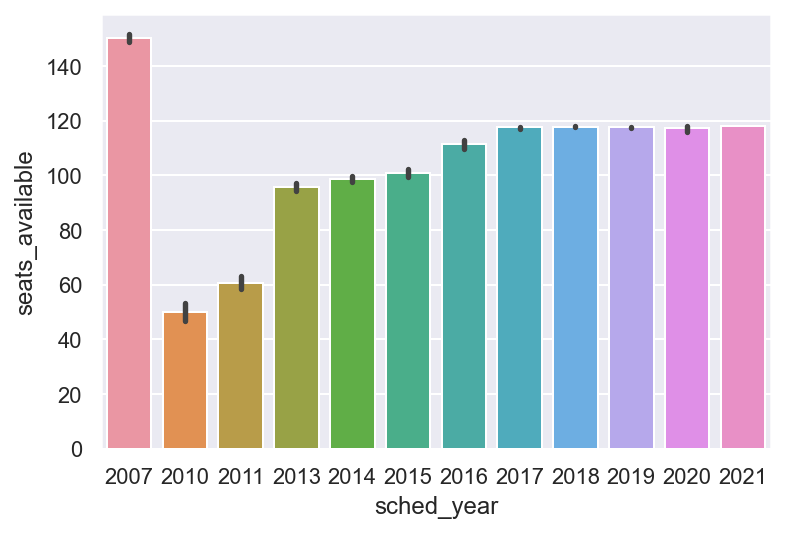

In [92]:
sns.barplot(data=four_list[0], x="sched_year", y="seats_available");

In [ ]:
# para onde cada uma destas rotas levou pax e #pax e valores

In [126]:
df_reg_origin_1 = df_reg[df_reg.cluster_origin == 1]
df_reg_origin_2 = df_reg[df_reg.cluster_origin == 2]
df_reg_origin_3 = df_reg[df_reg.cluster_origin == 3]
df_reg_origin_4 = df_reg[df_reg.cluster_origin == 4]
df_reg_origin_5 = df_reg[df_reg.cluster_origin == 5]
df_reg_origin_6 = df_reg[df_reg.cluster_origin == 6]
df_reg_origin_7 = df_reg[df_reg.cluster_origin == 7]
df_reg_cluster_8 = df_reg[df_reg.cluster_origin == 8]

In [127]:
heatmap_reg_origin_1 = df_reg_origin_1.groupby(['sched_year', 'route_icao'])['seats_available'].mean().unstack().round(0)
heatmap_reg_origin_2 = df_reg_origin_2.groupby(['sched_year', 'route_icao'])['seats_available'].mean().unstack().round(0)
heatmap_reg_origin_3 = df_reg_origin_3.groupby(['sched_year', 'route_icao'])['seats_available'].mean().unstack().round(0)
heatmap_reg_origin_4 = df_reg_origin_4.groupby(['sched_year', 'route_icao'])['seats_available'].mean().unstack().round(0)
heatmap_reg_origin_5 = df_reg_origin_5.groupby(['sched_year', 'route_icao'])['seats_available'].mean().unstack().round(0)
heatmap_reg_origin_6 = df_reg_origin_6.groupby(['sched_year', 'route_icao'])['seats_available'].mean().unstack().round(0)
heatmap_reg_origin_7 = df_reg_origin_7.groupby(['sched_year', 'route_icao'])['seats_available'].mean().unstack().round(0)
heatmap_reg_origin_8 = df_reg_cluster_8.groupby(['sched_year', 'route_icao'])['seats_available'].mean().unstack().round(0)

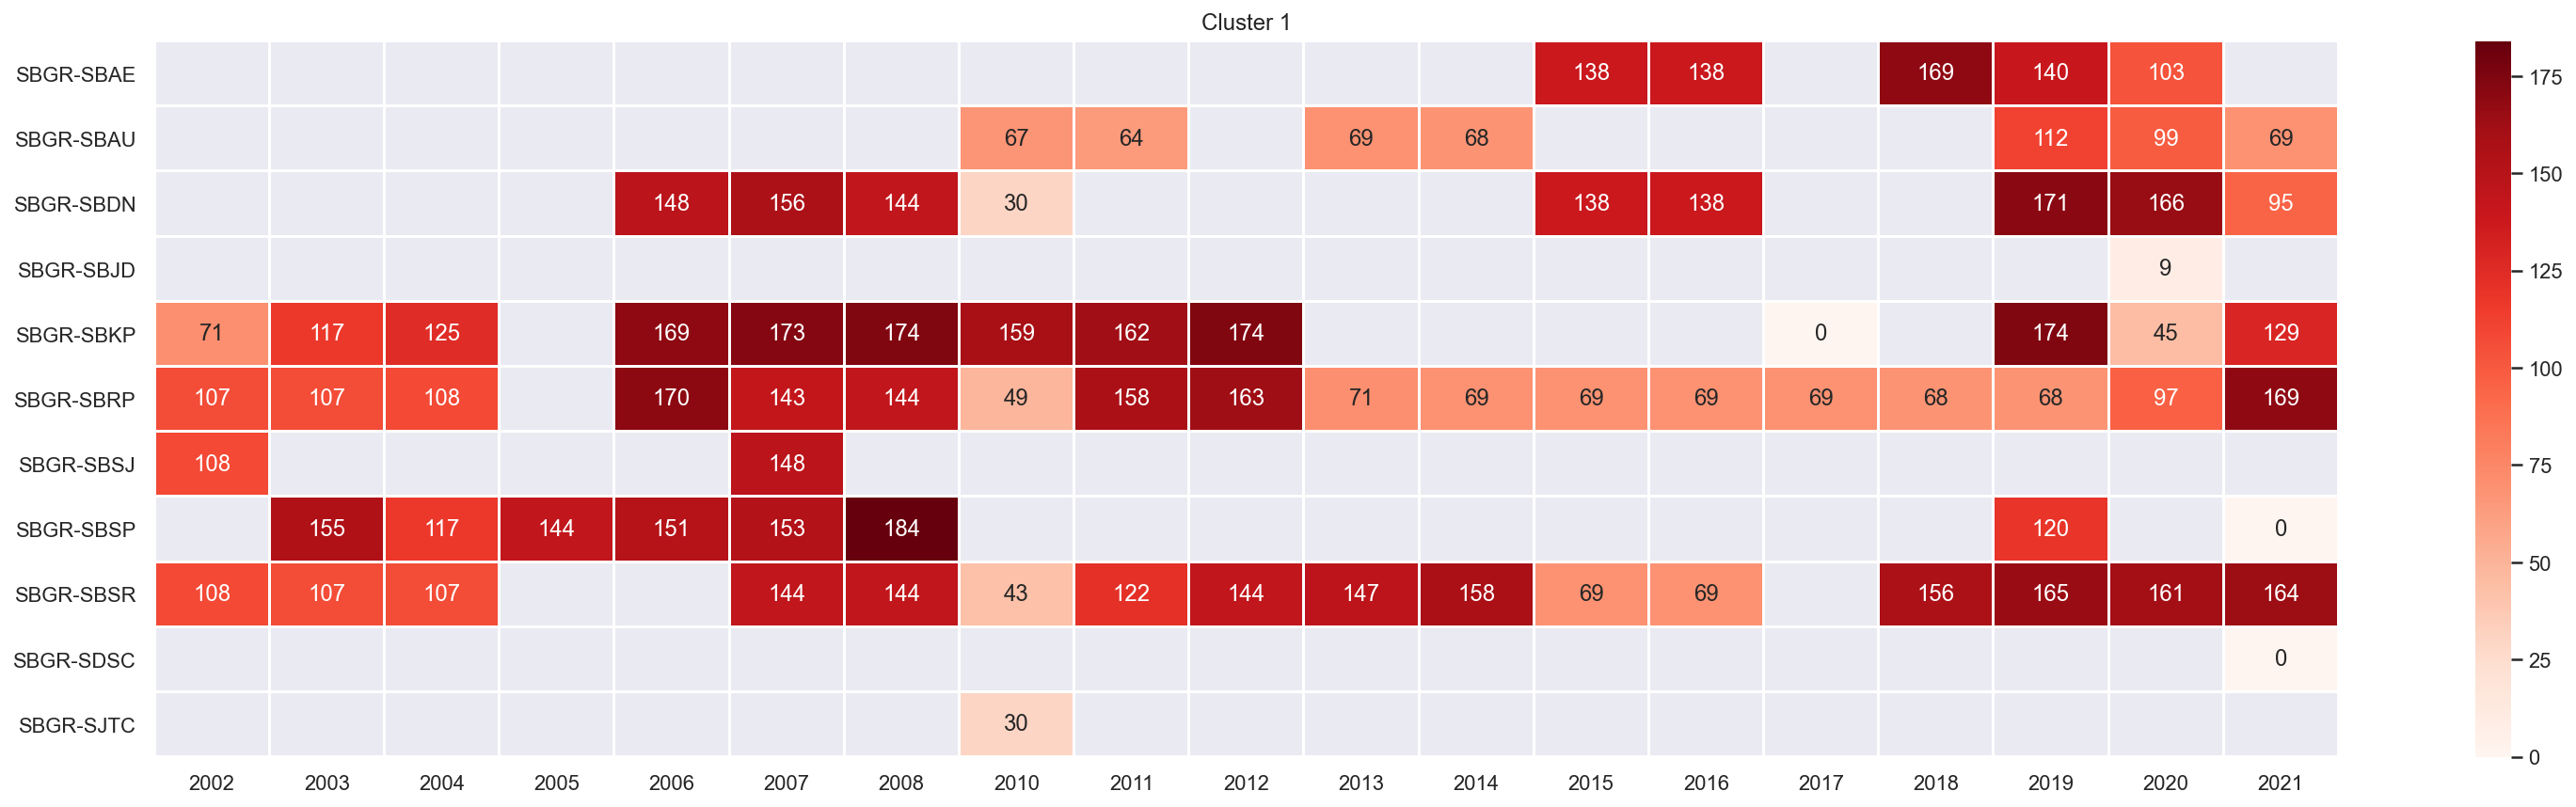

In [179]:
fig, ax = plt.subplots(figsize=(26,7))

sns.heatmap(heatmap_reg_origin_1.T, ax=ax, linewidths=1, cmap="Reds", annot=True, fmt='.0f')
ax.set(title='Cluster 1')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show();

In [ ]:
# Cluster 1

In [ ]:
df_reg_cluster_1 = df_reg[df_reg.cluster_origin == 1]

In [ ]:
cluster_1_growth = df_reg_cluster_1.groupby(['sched_year', 'route_icao'])['seats_available'].mean().unstack()

In [ ]:
cluster_1_growth = cluster_1_growth.T.reset_index()

In [ ]:
cluster_1_growth

In [ ]:
cluster_1_growth_percentage = cluster_1_growth[['route_icao']].join(cluster_1_growth.filter(like='20').pct_change(axis=1).mul(100).round(2))

In [ ]:
cluster_1_growth_percentage = cluster_1_growth_percentage.iloc[:,1:18]

In [ ]:
cluster_1_growth_percentage

In [ ]:
# positive values

In [ ]:
len(cluster_1_growth_percentage.loc[cluster_1_growth_percentage.ge(1).sum(axis=1).ge(2)])

In [ ]:
len(cluster_1_growth_percentage.loc[cluster_1_growth_percentage.ge(1).sum(axis=1).ge(3)])

In [ ]:
len(cluster_1_growth_percentage.loc[cluster_1_growth_percentage.ge(1).sum(axis=1).ge(4)])

In [ ]:
cluster_1_growth_percentage_four = cluster_1_growth_percentage.loc[cluster_1_growth_percentage.ge(1).sum(axis=1).ge(4)]

In [ ]:
cluster_1_growth_percentage_four

In [ ]:
cluster_1_growth_percentage_four.ge(4)

In [ ]:
cluster_1_growth_percentage_four.ge(1).sum(axis=1)

In [ ]:
cluster_1_growth_percentage_four.ge(1).sum(axis=1).ge(4)

In [ ]:
cluster_1_growth_percentage_four.style.background_gradient(cmap="Blues").highlight_max(color="red").highlight_min(color="green")

In [ ]:
cluster_1_growth_percentage_four_graph = pd.merge(cluster_1_growth_percentage_four, cluster_1_growth, left_index=True, right_index=True, suffixes=('_delme', '')).round(2)

In [ ]:
cluster_1_growth_percentage_four_graph = cluster_1_growth_percentage_four_graph.iloc[:,17:]

In [ ]:
cluster_1_growth_percentage_four_graph

In [ ]:
temp_list = cluster_1_growth_percentage_four_graph.route_icao.to_list()

In [ ]:
temp_list

In [ ]:
four_list = []

for route in temp_list:
    print(route)
    four_list.append(df_reg_cluster_1[df_reg_cluster_1.route_icao == route])
    
cluster_1_growth_selected = pd.concat(four_list)

In [ ]:
cluster_1_growth_selected

In [ ]:
cluster_1_growth_selected.to_csv('./assets/csv/analysis/cluster_1_growth_selected.csv', sep=',')